In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import levene, shapiro
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

In [3]:
#Load the Dataset
df = pd.read_excel("FMCG_Dataset.xlsx")
df.head()

,Transaction_ID,Date,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit
0,1,2023-01-01,Personal Care,Brand B,30.59,18,0.30,60+,East,Offline,12.25,3900.16,18.98,491,90.619523,550.62,165.1860
1,2,2023-01-02,Household,Brand C,15.65,16,0.16,60+,West,Online,3.20,549.26,12.26,297,75.439891,250.40,40.0640
2,3,2023-01-03,Dairy,Brand D,21.13,11,0.22,18-25,North,Online,9.13,1572.93,25.93,808,78.517927,232.43,51.1346
3,4,2023-01-04,Household,Brand B,11.67,10,0.26,26-35,West,Offline,0.15,928.54,14.07,583,88.150561,116.70,30.3420
4,5,2023-01-05,Household,Brand B,48.34,9,0.27,36-45,East,Online,12.53,2606.19,20.21,57,93.867894,435.06,117.4662


In [4]:
#Removing unecessary columns like Transaction_ID and Date:

df = df.drop(columns=['Transaction_ID', 'Date'])
df

,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit
0,Personal Care,Brand B,30.59,18,0.30,60+,East,Offline,12.25,3900.16,18.98,491,90.619523,550.62,165.1860
1,Household,Brand C,15.65,16,0.16,60+,West,Online,3.20,549.26,12.26,297,75.439891,250.40,40.0640
2,Dairy,Brand D,21.13,11,0.22,18-25,North,Online,9.13,1572.93,25.93,808,78.517927,232.43,51.1346
3,Household,Brand B,11.67,10,0.26,26-35,West,Offline,0.15,928.54,14.07,583,88.150561,116.70,30.3420
4,Household,Brand B,48.34,9,0.27,36-45,East,Online,12.53,2606.19,20.21,57,93.867894,435.06,117.4662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Personal Care,Brand C,20.73,6,0.19,60+,South,Offline,17.40,1426.22,42.09,703,83.225787,124.38,23.6322
4996,Personal Care,Brand C,17.83,19,0.27,46-60,South,Online,17.12,4566.40,18.16,708,99.535730,338.77,91.4679
4997,Household,Brand D,20.64,10,0.36,26-35,South,Online,16.74,231.95,29.53,767,86.067044,206.40,74.3040
4998,Personal Care,Brand A,38.29,1,0.35,36-45,East,Offline,10.98,182.46,19.55,978,99.367344,38.29,13.4015


In [5]:
categorical = [col for col in df.columns if df[col].dtype == 'object']

print(categorical)

['Product_Category', 'Brand', 'Customer_Age_Group', 'Region', 'Sales_Channel']


In [6]:
df.columns

Index(['Product_Category', 'Brand', 'Unit_Price', 'Units_Sold',
       'Profit_Margin', 'Customer_Age_Group', 'Region', 'Sales_Channel',
       'Discount_Applied', 'Marketing_Spend', 'Competitor_Price',
       'Stock_Levels', 'Supplier_Reliability', 'Total_Revenue', 'Profit'],
      dtype='object')

# **EDA**

Mean: 25.224733999999998
Median: 24.97


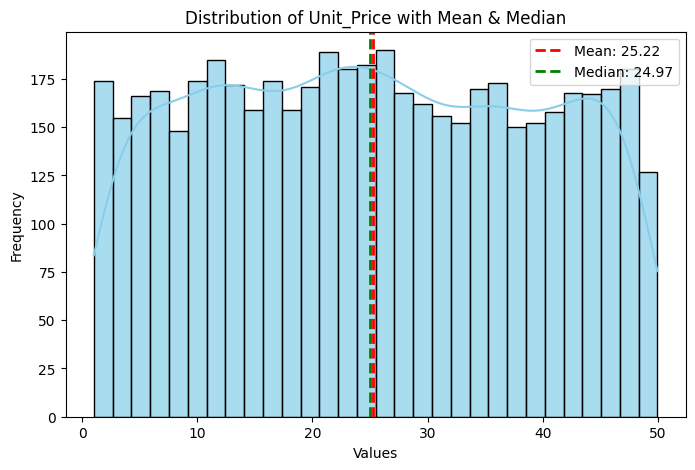

Mean: 0.248638
Median: 0.25


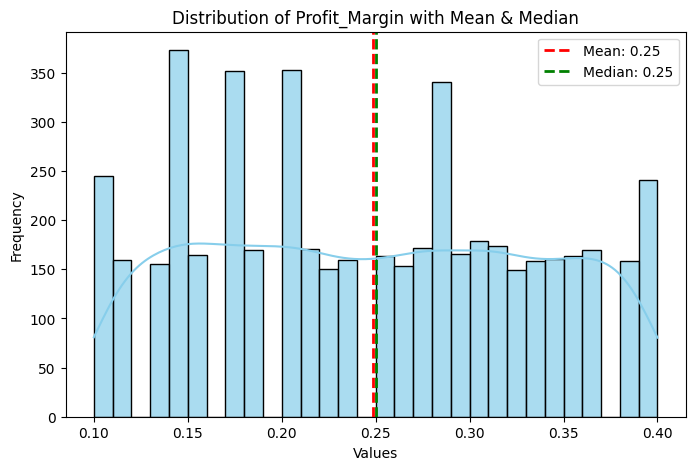

Mean: 9.930454000000001
Median: 10.04


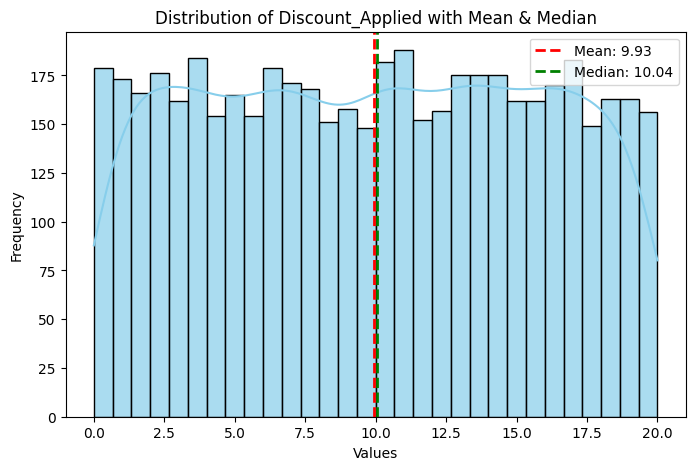

Mean: 2536.28372
Median: 2515.555


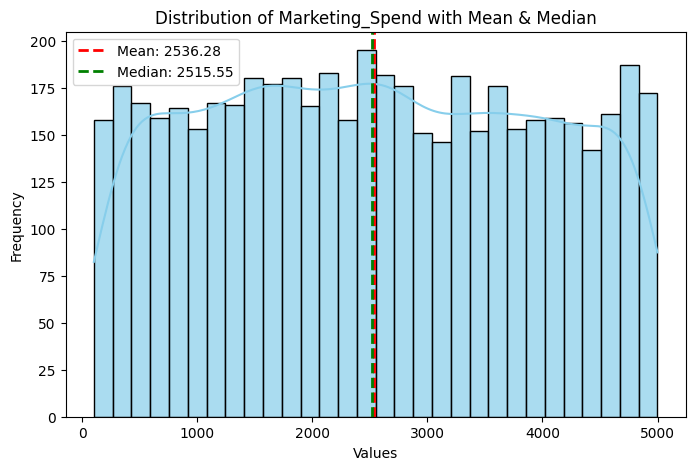

Mean: 25.731258
Median: 25.715


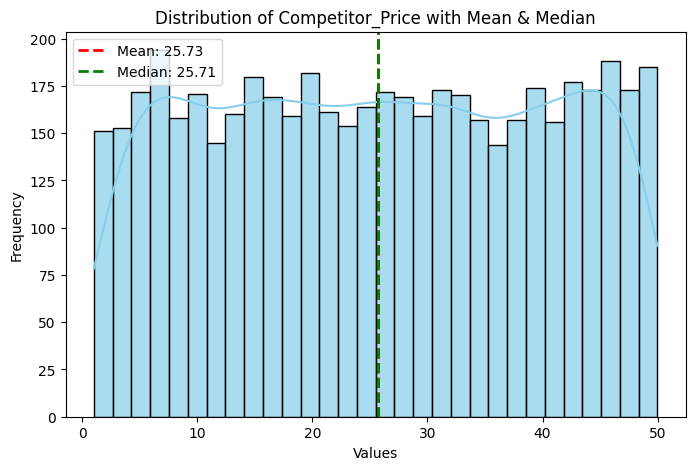

Mean: 85.05423306732169
Median: 84.99868368025855


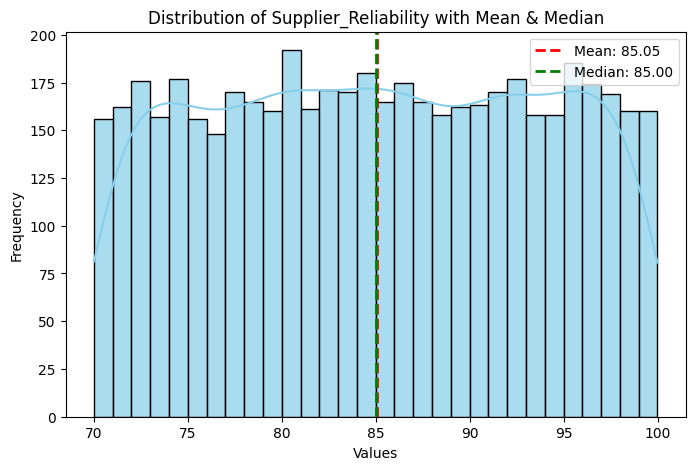

Mean: 253.147242
Median: 193.86


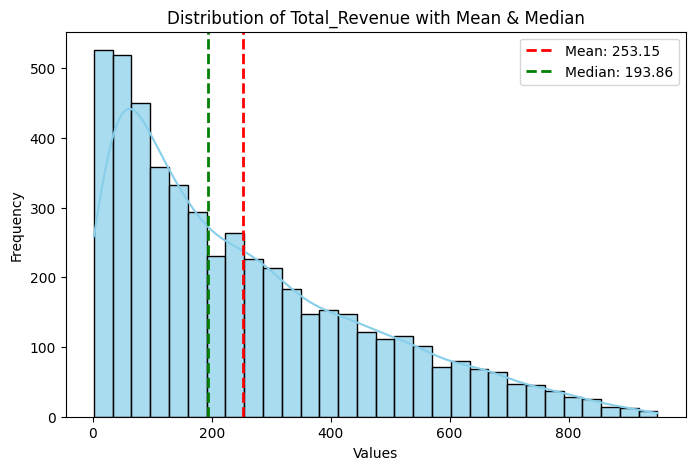

Mean: 62.93187952
Median: 43.3667


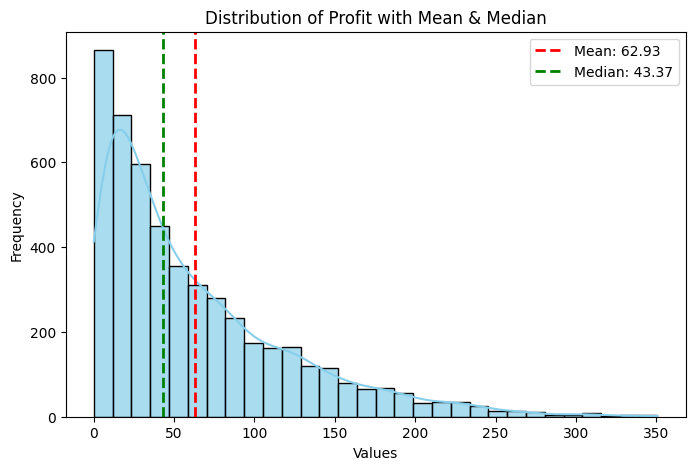

In [7]:
numerical = [col for col in df.columns if df[col].dtype == 'float']
for col in numerical:
  column = df[col]

  # Calculate mean and median
  mean_value = column.mean()
  median_value = column.median()
  print(f"Mean: {mean_value}")
  print(f"Median: {median_value}")

  plt.figure(figsize=(8, 5))
  sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

  # Add vertical lines for mean and median
  plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
  plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

  # Add labels and legend
  plt.xlabel("Values")
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {col} with Mean & Median")
  plt.legend()

  # Show the plot
  plt.show()

As evident from the histogram plots, the variables 'Total_Revenue' and 'Profit' are negatively skewed.

# **Fixing skew of 'Total_Revenue' and 'Profit'**


1. Profit

In [8]:
#Normalising 'Profit'

#Trying different transformation techniques to see which one gives best results:

from scipy.stats import shapiro, boxcox
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns

profit = df['Profit']

# Dictionary to hold results
transformed_data = {
    'Original': profit,
    'Log': np.log(profit + 1),
    'Square Root': np.sqrt(profit + 1),
    'Cube Root': np.cbrt(profit)
}

# Box-Cox (only if all values > 0)
if (profit > 0).all():
    transformed_data['Box-Cox'], _ = boxcox(profit + 1)

# Yeo-Johnson (handles 0 and negative)
pt = PowerTransformer(method='yeo-johnson')
transformed_data['Yeo-Johnson'] = pt.fit_transform(profit.values.reshape(-1, 1)).flatten()

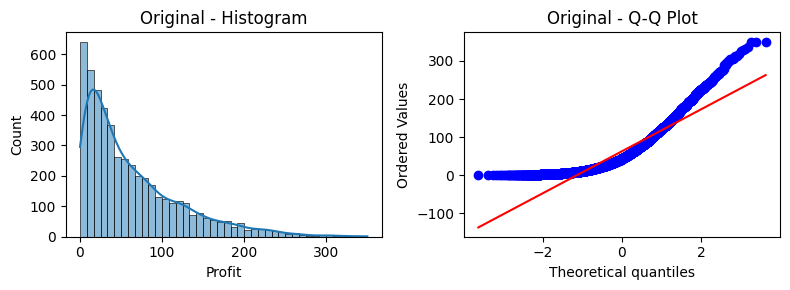

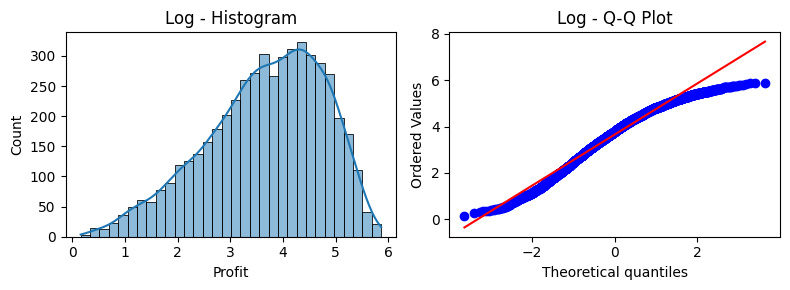

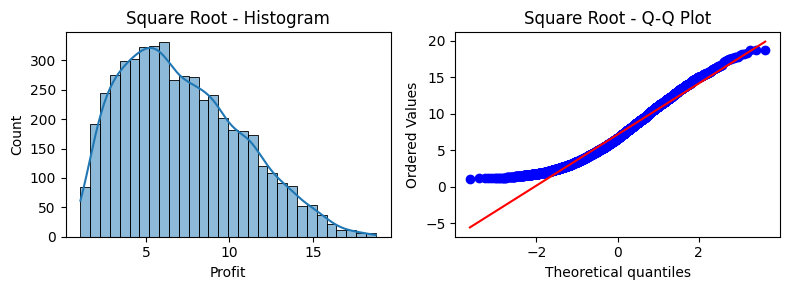

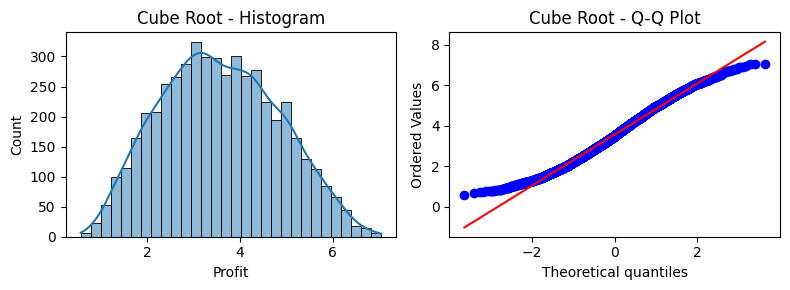

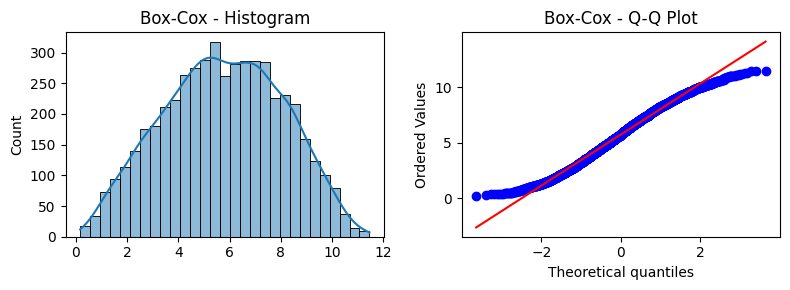

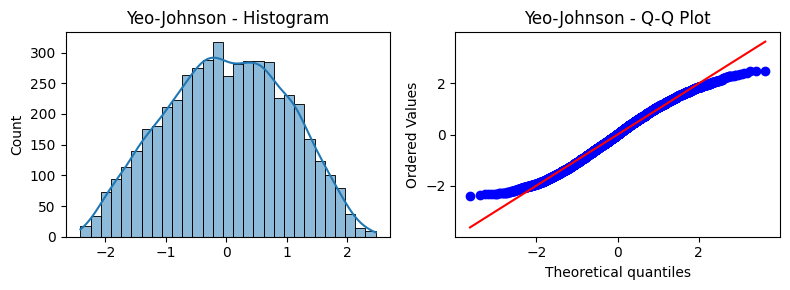

In [9]:
import scipy.stats as stats

for name, values in transformed_data.items():
    plt.figure(figsize=(8, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(values, kde=True)
    plt.title(f'{name} - Histogram')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(values, dist="norm", plot=plt)
    plt.title(f'{name} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

In [10]:
p_values = {}

# Run Shapiro-Wilk on each transformed version
for name, values in transformed_data.items():
    stat, p = shapiro(values)
    p_values[name] = p  # Store name and p-value in dictionary

# Print the dictionary (optional)
print("P-values from Shapiro-Wilk test:")
for name, p in p_values.items():
    print(f"{name}: {p}")

# Find the transformation with the highest p-value
best_transformation = max(p_values, key=p_values.get)
print(f"\n✅ Best transformation: {best_transformation} (p = {p_values[best_transformation]})")

P-values from Shapiro-Wilk test:
Original: 1.5151926837093155e-55
Log: 7.572230887804687e-30
Square Root: 3.1060251539320116e-32
Cube Root: 2.74004779749528e-18
Box-Cox: 2.0598961709388494e-18
Yeo-Johnson: 2.0598964426876196e-18

✅ Best transformation: Cube Root (p = 2.74004779749528e-18)


In [11]:
#Adding new column to df with transformed profits --- I will be using this column to conduct ANOVA
df['Profit_trans'] = np.cbrt(profit)
df.head()

,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit,Profit_trans
0,Personal Care,Brand B,30.59,18,0.30,60+,East,Offline,12.25,3900.16,18.98,491,90.619523,550.62,165.1860,5.486867
1,Household,Brand C,15.65,16,0.16,60+,West,Online,3.20,549.26,12.26,297,75.439891,250.40,40.0640,3.421775
2,Dairy,Brand D,21.13,11,0.22,18-25,North,Online,9.13,1572.93,25.93,808,78.517927,232.43,51.1346,3.711689
3,Household,Brand B,11.67,10,0.26,26-35,West,Offline,0.15,928.54,14.07,583,88.150561,116.70,30.3420,3.118995
4,Household,Brand B,48.34,9,0.27,36-45,East,Online,12.53,2606.19,20.21,57,93.867894,435.06,117.4662,4.897461


**2. Total Revenue**

In [12]:
#Normalising 'Total_Revenue'

#Trying different transformation techniques to see which one gives best results:

revenue = df['Total_Revenue']

# Dictionary to hold results
transformed_data = {
    'Original': revenue,
    'Log': np.log(revenue + 1),
    'Square Root': np.sqrt(revenue + 1),
    'Cube Root': np.cbrt(revenue)
}

# Box-Cox (only if all values > 0)
if (revenue > 0).all():
    transformed_data['Box-Cox'], _ = boxcox(revenue + 1)

# Yeo-Johnson (handles 0 and negative)
pt = PowerTransformer(method='yeo-johnson')
transformed_data['Yeo-Johnson'] = pt.fit_transform(profit.values.reshape(-1, 1)).flatten()

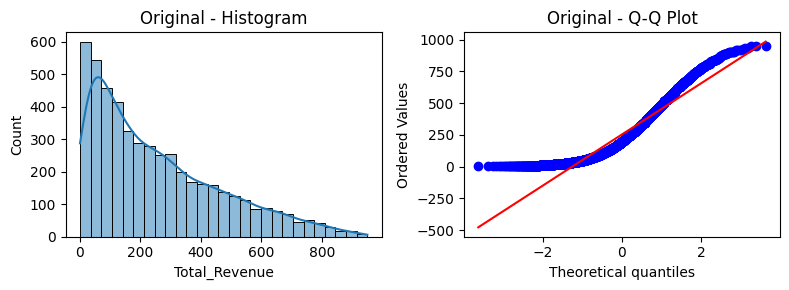

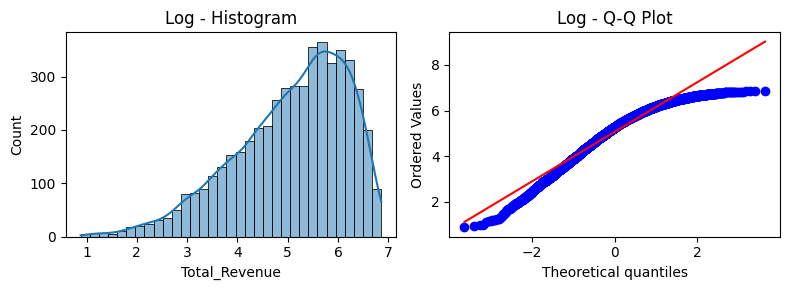

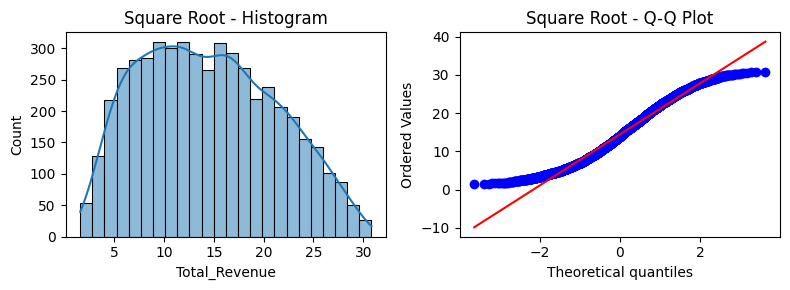

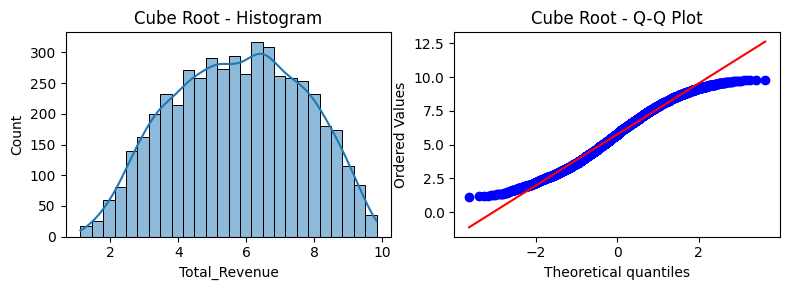

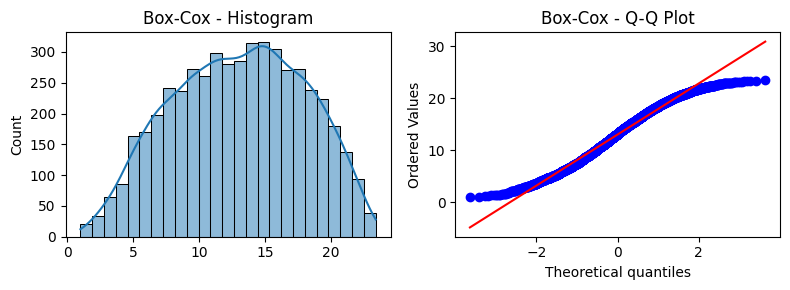

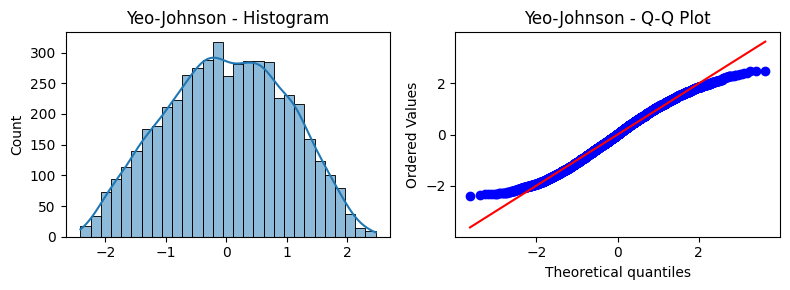

In [13]:
import scipy.stats as stats

for name, values in transformed_data.items():
    plt.figure(figsize=(8, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(values, kde=True)
    plt.title(f'{name} - Histogram')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(values, dist="norm", plot=plt)
    plt.title(f'{name} - Q-Q Plot')

    plt.tight_layout()
    plt.show()

In [14]:
p_values = {}

# Run Shapiro-Wilk on each transformed version
for name, values in transformed_data.items():
    stat, p = shapiro(values)
    p_values[name] = p  # Store name and p-value in dictionary

# Print the dictionary (optional)
print("P-values from Shapiro-Wilk test:")
for name, p in p_values.items():
    print(f"{name}: {p}")

# Find the transformation with the highest p-value
best_transformation = max(p_values, key=p_values.get)
best_transformation

P-values from Shapiro-Wilk test:
Original: 1.2262878686482473e-48
Log: 4.1208694416610707e-38
Square Root: 3.0977193354682245e-28
Cube Root: 4.621396092684766e-23
Box-Cox: 1.4984583933902447e-23
Yeo-Johnson: 2.0598964426876196e-18


'Yeo-Johnson'

In [15]:
#Adding new column to df with transformed revenue --- I will be using this column for total revenue
pt = PowerTransformer(method='yeo-johnson')
df['revenue_trans'] = pt.fit_transform(df[['Total_Revenue']])

df.head()

,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit,Profit_trans,revenue_trans
0,Personal Care,Brand B,30.59,18,0.30,60+,East,Offline,12.25,3900.16,18.98,491,90.619523,550.62,165.1860,5.486867,1.271860
1,Household,Brand C,15.65,16,0.16,60+,West,Online,3.20,549.26,12.26,297,75.439891,250.40,40.0640,3.421775,0.295788
2,Dairy,Brand D,21.13,11,0.22,18-25,North,Online,9.13,1572.93,25.93,808,78.517927,232.43,51.1346,3.711689,0.215232
3,Household,Brand B,11.67,10,0.26,26-35,West,Offline,0.15,928.54,14.07,583,88.150561,116.70,30.3420,3.118995,-0.448099
4,Household,Brand B,48.34,9,0.27,36-45,East,Online,12.53,2606.19,20.21,57,93.867894,435.06,117.4662,4.897461,0.954857


# **Checking whether different Brands have a significant difference in average profits**

**H0: Mean Profit of all Brands are equal**

**Ha: Mean Profit of atleast one Brand is significantly different**

1. Grouping by brand type

In [16]:
df

,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit,Profit_trans,revenue_trans
0,Personal Care,Brand B,30.59,18,0.30,60+,East,Offline,12.25,3900.16,18.98,491,90.619523,550.62,165.1860,5.486867,1.271860
1,Household,Brand C,15.65,16,0.16,60+,West,Online,3.20,549.26,12.26,297,75.439891,250.40,40.0640,3.421775,0.295788
2,Dairy,Brand D,21.13,11,0.22,18-25,North,Online,9.13,1572.93,25.93,808,78.517927,232.43,51.1346,3.711689,0.215232
3,Household,Brand B,11.67,10,0.26,26-35,West,Offline,0.15,928.54,14.07,583,88.150561,116.70,30.3420,3.118995,-0.448099
4,Household,Brand B,48.34,9,0.27,36-45,East,Online,12.53,2606.19,20.21,57,93.867894,435.06,117.4662,4.897461,0.954857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Personal Care,Brand C,20.73,6,0.19,60+,South,Offline,17.40,1426.22,42.09,703,83.225787,124.38,23.6322,2.869688,-0.392528
4996,Personal Care,Brand C,17.83,19,0.27,46-60,South,Online,17.12,4566.40,18.16,708,99.535730,338.77,91.4679,4.505637,0.642458
4997,Household,Brand D,20.64,10,0.36,26-35,South,Online,16.74,231.95,29.53,767,86.067044,206.40,74.3040,4.204078,0.090534
4998,Personal Care,Brand A,38.29,1,0.35,36-45,East,Offline,10.98,182.46,19.55,978,99.367344,38.29,13.4015,2.375296,-1.259377


In [17]:
#Grouping profit_trans by brand
grouped = df.groupby('Brand')['Profit_trans'].apply(list)

In [18]:
grouped

,Profit_trans
Brand,
Brand A,"[4.731167538336857, 3.9241889137727703, 1.5303..."
Brand B,"[5.486866736110449, 3.1189954030640963, 4.8974..."
Brand C,"[3.421774895773977, 2.9187058755272237, 3.4946..."
Brand D,"[3.7116893520379586, 0.7420493473233611, 3.608..."


2. Checking for normality in the different groups

In [19]:
from scipy.stats import shapiro

# Loop through each unique Brand group and run Shapiro-Wilk test on Profit

for brand, profits in grouped.items():
    stat, p = shapiro(profits)
    print(f"Brand: {brand} | Shapiro-Wilk p-value = {p:.4f}")
    if p > 0.05:
        print("Data follows a normal distribution.")
    else:
        print("Data does not follow a normal distribution.")

Brand: Brand A | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.
Brand: Brand B | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.
Brand: Brand C | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.
Brand: Brand D | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.


Currently all the groups fail the test for normality.

However, this test is not useful for samples with observations above 5000, hence visual representations and lilliefors test is taken up to check for normality in data.

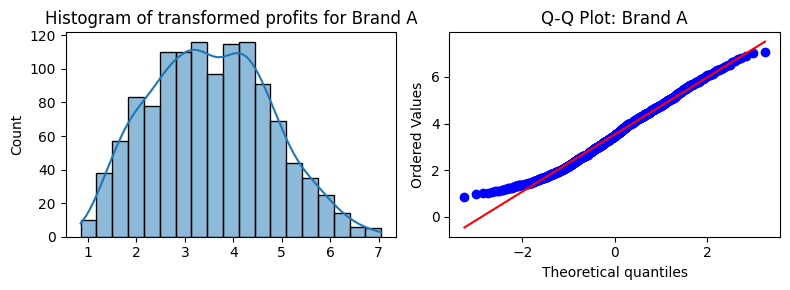

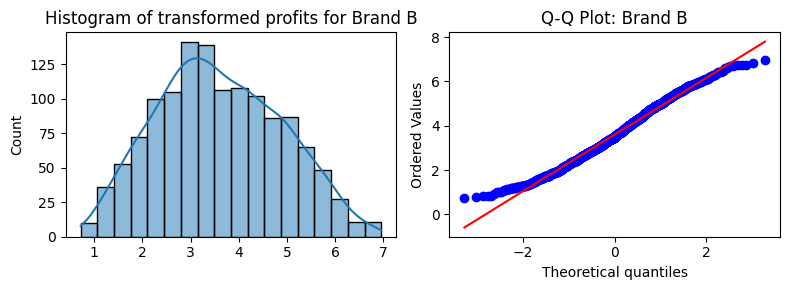

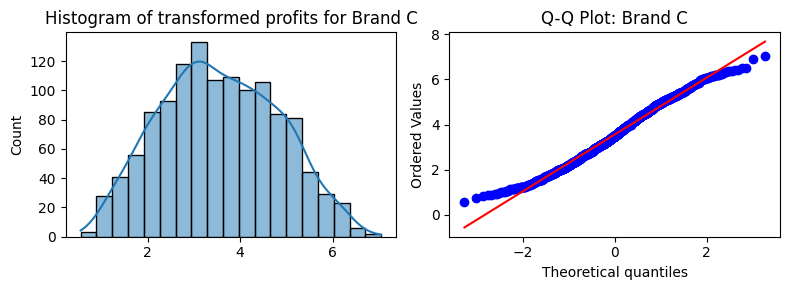

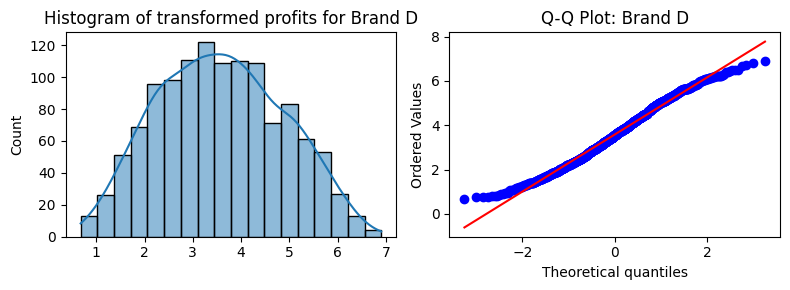

In [20]:
for brand, profits in grouped.items():
  plt.figure(figsize=(8,3))

  plt.subplot(1, 2, 1)
  sns.histplot(profits, kde=True)
  plt.title(f"Histogram of transformed profits for {brand}")

  plt.subplot(1, 2, 2)
  stats.probplot(profits, dist="norm", plot=plt)
  plt.title(f"Q-Q Plot: {brand}")

  plt.tight_layout()
  plt.show()

The plots show that the distributions of profits for all four brands are now approximately normal. Therefore the normality assumption for ANOVA is satisfied.

3. Checking for homogeniety of variance

In [21]:
# Perform Levene's test

# Unpack all lists (grouped by Brand) into the levene function
levene_stat, p_value = levene(*grouped.values)

# Output the results
print(f"Levene's test statistic: {levene_stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The variances are significantly different (reject the null hypothesis).")
else:
    print("The variances are not significantly different (fail to reject the null hypothesis).")

Levene's test statistic: 1.4247120829817528
p-value: 0.2334797263499088
The variances are not significantly different (fail to reject the null hypothesis).


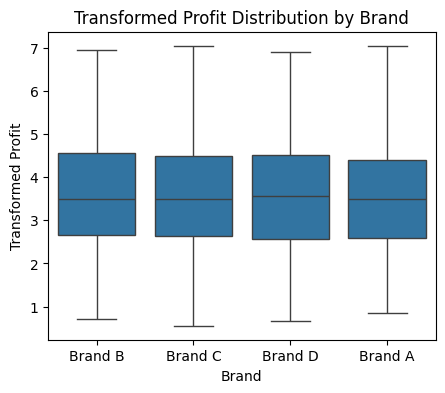

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

sns.boxplot(x='Brand', y='Profit_trans', data=df)
plt.title('Transformed Profit Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Transformed Profit')
plt.show()


Therefore variances are homogenous

4. Running the ANOVA

In [23]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(*grouped)
print(f"ANOVA: F = {f_stat:.3f}, p = {p_value:.4}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")

ANOVA: F = 0.779, p = 0.5055
Fail to reject the null hypothesis. There is no significant difference in means.


Therefore, this proves that there is no statistically significant difference between the profits earned from the different brands. Therefore, from a strategy or marketing standpoint, this means no single brand is consistently outperforming or underperforming in terms of profit.

# **Checking whether the price difference between own price and competitor's price has a significant effect on units sold.**

In [24]:
df['price_diff'] = df['Unit_Price'] - df['Competitor_Price']
df

,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit,Profit_trans,revenue_trans,price_diff
0,Personal Care,Brand B,30.59,18,0.30,60+,East,Offline,12.25,3900.16,18.98,491,90.619523,550.62,165.1860,5.486867,1.271860,11.61
1,Household,Brand C,15.65,16,0.16,60+,West,Online,3.20,549.26,12.26,297,75.439891,250.40,40.0640,3.421775,0.295788,3.39
2,Dairy,Brand D,21.13,11,0.22,18-25,North,Online,9.13,1572.93,25.93,808,78.517927,232.43,51.1346,3.711689,0.215232,-4.80
3,Household,Brand B,11.67,10,0.26,26-35,West,Offline,0.15,928.54,14.07,583,88.150561,116.70,30.3420,3.118995,-0.448099,-2.40
4,Household,Brand B,48.34,9,0.27,36-45,East,Online,12.53,2606.19,20.21,57,93.867894,435.06,117.4662,4.897461,0.954857,28.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Personal Care,Brand C,20.73,6,0.19,60+,South,Offline,17.40,1426.22,42.09,703,83.225787,124.38,23.6322,2.869688,-0.392528,-21.36
4996,Personal Care,Brand C,17.83,19,0.27,46-60,South,Online,17.12,4566.40,18.16,708,99.535730,338.77,91.4679,4.505637,0.642458,-0.33
4997,Household,Brand D,20.64,10,0.36,26-35,South,Online,16.74,231.95,29.53,767,86.067044,206.40,74.3040,4.204078,0.090534,-8.89
4998,Personal Care,Brand A,38.29,1,0.35,36-45,East,Offline,10.98,182.46,19.55,978,99.367344,38.29,13.4015,2.375296,-1.259377,18.74


1. Checking for linear relationship

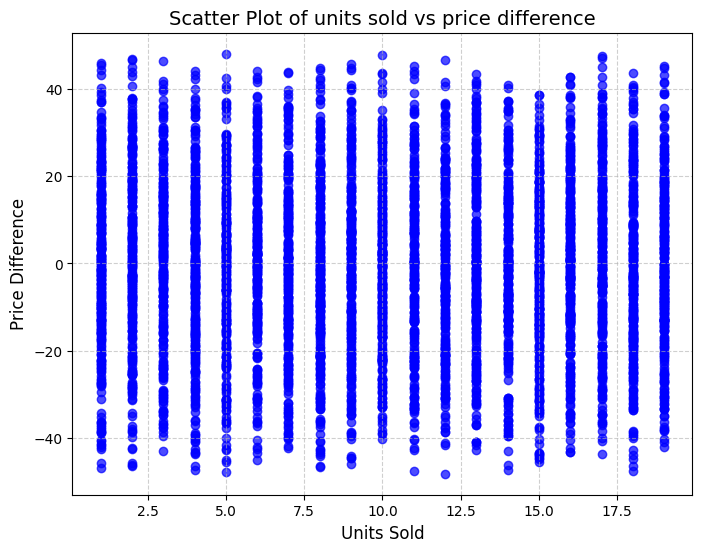

In [25]:
# Scatter plot - check for linearity
plt.figure(figsize=(8,6))
plt.scatter(df["Units_Sold"], df["price_diff"], alpha=0.7, color='blue')
plt.title("Scatter Plot of units sold vs price difference", fontsize=14)
plt.xlabel("Units Sold", fontsize=12)
plt.ylabel("Price Difference", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [26]:
from scipy.stats import levene
# Group the data by unique units
unit_groups = df.groupby("Units_Sold")['price_diff'].apply(list)

# Conduct Levene's test for equal variances
levene_stat, p_value = levene(*unit_groups)
#the * is wildcard, it enables us to not count the groups, instead letting python

print(f"Levene's Statistic: {levene_stat}")
print(f"p-value: {p_value}")

Levene's Statistic: 0.7342006945090621
p-value: 0.7783838663230552


In [27]:
# Conduct Shapiro-Wilk test for normality for each group
shapiro_results = {}
for units, price_diff in unit_groups.items():
  stat, p = shapiro(price_diff)
  shapiro_results[units] = {'Shapiro Statistic': stat, 'p-value': p}

# Display the shapiro-Wilk test results
for units, results in shapiro_results.items():
  print(f"Units_sold: {units}")
  print(f" Shapiro- Statistic: {results['Shapiro Statistic']}")
  print(f" p-value: {results['p-value']}")

Units_sold: 1
 Shapiro- Statistic: 0.991419730980616
 p-value: 0.10098076935068023
Units_sold: 2
 Shapiro- Statistic: 0.989067542339123
 p-value: 0.04227200557699811
Units_sold: 3
 Shapiro- Statistic: 0.984411632474353
 p-value: 0.008381845144416892
Units_sold: 4
 Shapiro- Statistic: 0.9910169901516749
 p-value: 0.10123848685921988
Units_sold: 5
 Shapiro- Statistic: 0.9914234022196501
 p-value: 0.1774746811830814
Units_sold: 6
 Shapiro- Statistic: 0.9913442810022783
 p-value: 0.1451186500243381
Units_sold: 7
 Shapiro- Statistic: 0.9879167425435619
 p-value: 0.028105208914696766
Units_sold: 8
 Shapiro- Statistic: 0.9881385947372782
 p-value: 0.025270521244489152
Units_sold: 9
 Shapiro- Statistic: 0.9906646682834964
 p-value: 0.09683756510090005
Units_sold: 10
 Shapiro- Statistic: 0.9891971167022259
 p-value: 0.039147819013311144
Units_sold: 11
 Shapiro- Statistic: 0.9860626616118422
 p-value: 0.024436518950938776
Units_sold: 12
 Shapiro- Statistic: 0.9903970289988876
 p-value: 0.1091563

Not all of the groups pass the Shapiro Wilkenson test, and from the scatter-plot also it is evident that there is not much of a linear relationship between the number of units sold and the price-differences between own price and competitor price. Therefore we abandon this SLR.

2. Binning price difference into different groups based on distribution, and then running ANOVA for units sold grouped by price difference bins

Mean: -0.506524
Median: -0.4300000000000024


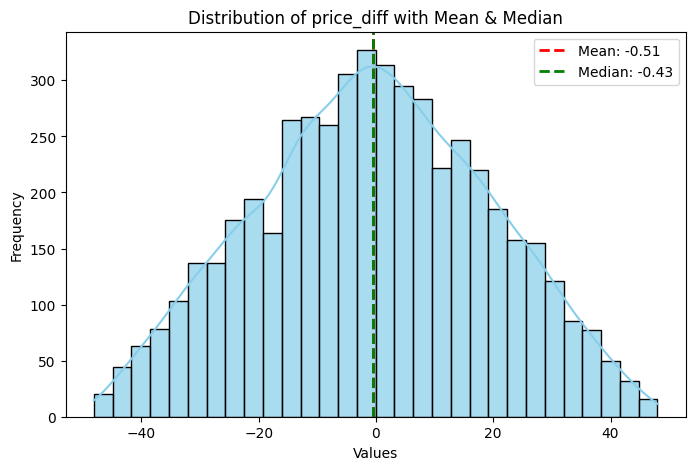

In [28]:
column = df["price_diff"]
# Calculate mean and median
mean_value = column.mean()
median_value = column.median()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")

plt.figure(figsize=(8, 5))
sns.histplot(column, bins=30, kde=True, color='skyblue', alpha=0.7)

#Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")

# Add labels and legend
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of price_diff with Mean & Median")
plt.legend()

# Show the plot
plt.show()

In [29]:
print(df['price_diff'].max(), df['price_diff'].min())

48.010000000000005 -48.120000000000005


The price differences seem fairly normally distributed, with a mean price difference close to 0. This allows us to make bins based on standard deviation.

In [30]:
# Calculate standard deviation
std = column.std()

# Create bins: Negative (< mean - std): price is much cheaper than competitor, Medium (within 1 std): price is similar, Positive (> mean + std): price is much higher than competitor
df['price_diff_group'] = pd.cut(
    df['price_diff'],
    bins=[-float('inf'), mean_value - std, mean_value + std, float('inf')],
    labels=['Negative', 'Medium', 'Positive']
)

# Group units sold by price_diff_group
pricediff_groups = df.groupby("price_diff_group")['Units_Sold'].apply(list)
pricediff_groups

<ipython-input-30-0a71e2762748>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pricediff_groups = df.groupby("price_diff_group")['Units_Sold'].apply(list)


,Units_Sold
price_diff_group,
Negative,"[12, 1, 1, 15, 4, 11, 5, 13, 16, 2, 17, 17, 13..."
Medium,"[18, 16, 11, 10, 19, 18, 14, 17, 11, 1, 2, 6, ..."
Positive,"[9, 15, 14, 9, 7, 2, 7, 18, 18, 11, 10, 2, 18,..."


In [31]:
# Loop through each price difference group and run Shapiro-Wilk test on units sold

for group, unitssold in pricediff_groups.items():
    stat, p = shapiro(unitssold)
    print(f"Group: {group} | Shapiro-Wilk p-value = {p:.4f}")
    if p > 0.05:
        print("Data follows a normal distribution.\n")
    else:
        print("Data does not follow a normal distribution.\n")

Group: Negative | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.

Group: Medium | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.

Group: Positive | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.



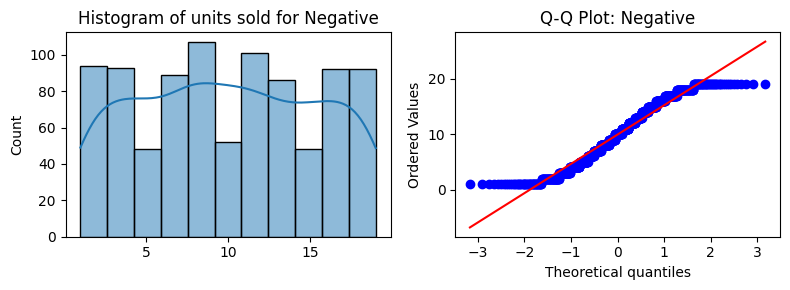

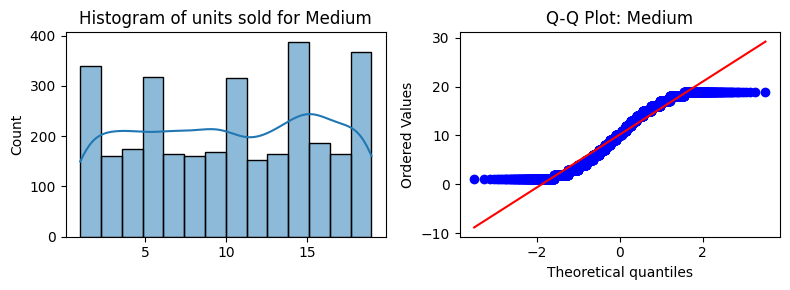

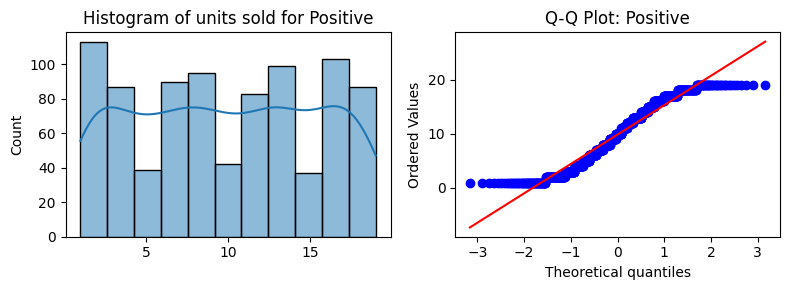

In [32]:
for group, unitssold in pricediff_groups.items():
  plt.figure(figsize=(8,3))

  plt.subplot(1, 2, 1)
  sns.histplot(unitssold,kde=True)
  plt.title(f"Histogram of units sold for {group}")

  plt.subplot(1, 2, 2)
  stats.probplot(unitssold, dist="norm", plot=plt)
  plt.title(f"Q-Q Plot: {group}")

  plt.tight_layout()
  plt.show()

From Q-Q Plot we can assume the values in each group are normally distributed

In [33]:
# Perform Levene's test

# Unpack all lists (grouped by Brand) into the levene function
levene_stat, p_value = levene(*pricediff_groups.values)

# Output the results
print(f"Levene's test statistic: {levene_stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The variances are significantly different (reject the null hypothesis).")
else:
    print("The variances are not significantly different (fail to reject the null hypothesis).")

Levene's test statistic: 1.7798066624272444
p-value: 0.16877766184632229
The variances are not significantly different (fail to reject the null hypothesis).


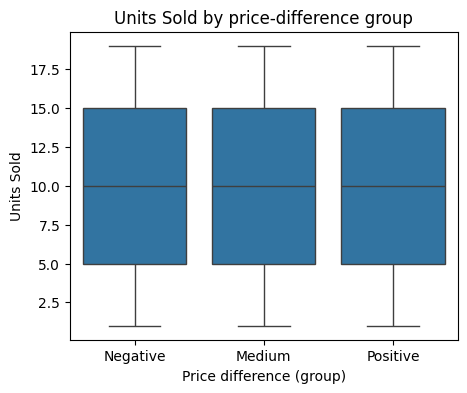

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

sns.boxplot(x='price_diff_group', y='Units_Sold', data=df)
plt.title('Units Sold by price-difference group')
plt.xlabel('Price difference (group)')
plt.ylabel('Units Sold')
plt.show()

In [35]:
#Running ANOVA

from scipy.stats import f_oneway

f_stat, p_value = f_oneway(*pricediff_groups)
print(f"ANOVA: F = {f_stat:.3f}, p = {p_value:.4}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in means of units sold.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means of units sold.")

ANOVA: F = 1.603, p = 0.2014
Fail to reject the null hypothesis. There is no significant difference in means of units sold.


In [36]:
for group, unitssold in pricediff_groups.items():
    print(f"Mean units sold for group {group}: {sum(unitssold) / len(unitssold)}")

Mean units sold for group Negative: 9.951219512195122
Mean units sold for group Medium: 10.194539249146757
Mean units sold for group Positive: 9.861714285714285


As the results are not significant, this shows that our 'cheaper' products, similarly priced products, and relatively 'expensive' products all have statistically the same number of sales.

# **Checking whether the price difference between own price and competitor's price has a significant effect on Profits.**

In [37]:
# Group profits by price_diff_group
pricediff_groups = df.groupby("price_diff_group")['Profit_trans'].apply(list)
pricediff_groups

<ipython-input-37-ad751dfcd6cf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pricediff_groups = df.groupby("price_diff_group")['Profit_trans'].apply(list)


,Profit_trans
price_diff_group,
Negative,"[2.9187058755272237, 0.7420493473233611, 1.530..."
Medium,"[5.486866736110449, 3.421774895773977, 3.71168..."
Positive,"[4.897460852999285, 6.191372843257008, 5.69481..."


In [38]:
# Loop through each price difference group and run Shapiro-Wilk test on profits

for group, profits in pricediff_groups.items():
    stat, p = shapiro(profits)
    print(f"Group: {group} | Shapiro-Wilk p-value = {p:.4f}")
    if p > 0.05:
        print("Data follows a normal distribution.\n")
    else:
        print("Data does not follow a normal distribution.\n")

Group: Negative | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.

Group: Medium | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.

Group: Positive | Shapiro-Wilk p-value = 0.0000
Data does not follow a normal distribution.



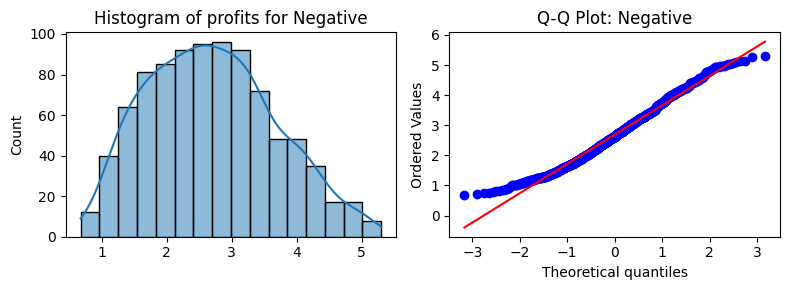

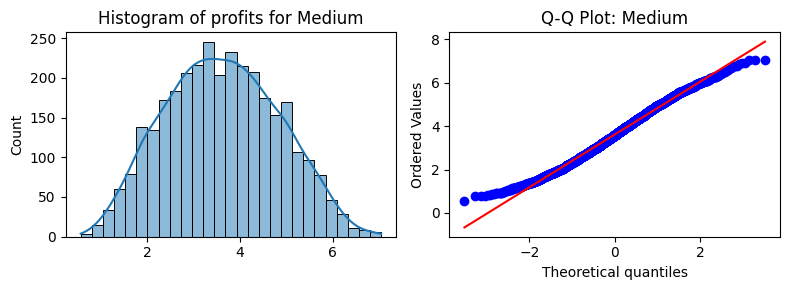

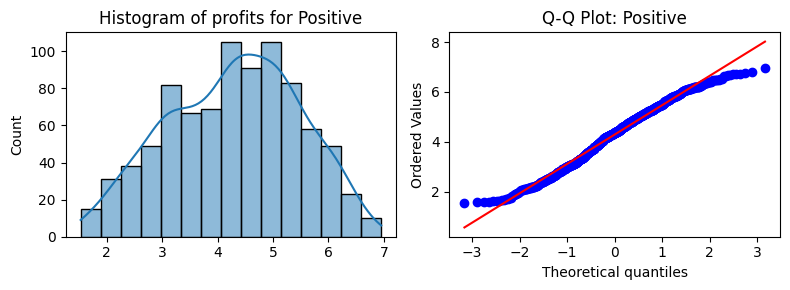

In [39]:
for group, profits in pricediff_groups.items():
  plt.figure(figsize=(8,3))

  plt.subplot(1, 2, 1)
  sns.histplot(profits,kde=True)
  plt.title(f"Histogram of profits for {group}")

  plt.subplot(1, 2, 2)
  stats.probplot(profits, dist="norm", plot=plt)
  plt.title(f"Q-Q Plot: {group}")

  plt.tight_layout()
  plt.show()

From Q-Q plot, these are fairly normally distributed

In [40]:
# Perform Levene's test

# Unpack all lists (grouped by Brand) into the levene function
levene_stat, p_value = levene(*pricediff_groups.values)

# Output the results
print(f"Levene's test statistic: {levene_stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("The variances are significantly different (reject the null hypothesis).")
else:
    print("The variances are not significantly different (fail to reject the null hypothesis).")

Levene's test statistic: 32.550335696602914
p-value: 9.012829247044829e-15
The variances are significantly different (reject the null hypothesis).


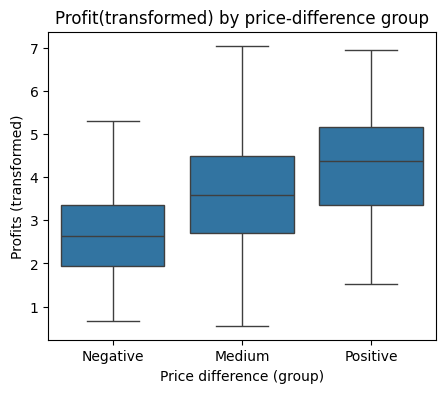

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))

sns.boxplot(x='price_diff_group', y='Profit_trans', data=df)
plt.title('Profit(transformed) by price-difference group')
plt.xlabel('Price difference (group)')
plt.ylabel('Profits (transformed)')
plt.show()

As the assumption of homogeniety in variance is violated, we will perform Welch's ANOVA instead.

In [42]:
#getting pingouin to perform welch's anova
%pip install pingouin
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.4 MB/s eta 0:00:00


In [43]:
# Perform Welch's ANOVA
welch_anova = pg.welch_anova(dv='Profit_trans', between='price_diff_group', data=df)
print(welch_anova)

             Source  ddof1        ddof2           F          p-unc       np2
0  price_diff_group      2  1815.914773  517.336425  1.536717e-178  0.143994


As the p value is less than 0.05, we reject the null. Therefore there is a significant difference in mean of profits between the three price difference groups. Next we find out which groups have significant differences.

In [44]:
# Perform pairwise comparisons with Tukey's HSD after Welch's ANOVA
posthoc = pg.pairwise_tests(dv='Profit_trans', between='price_diff_group', data=df,
                             parametric=False, padjust='bonf')  # Using non-parametric with Bonferroni correction for p-value adjustment

# Print the post-hoc results
print(posthoc)

           Contrast         A         B  Paired  Parametric     U-val  \
0  price_diff_group  Negative    Medium   False       False  824477.5   
1  price_diff_group  Negative  Positive   False       False  124110.5   
2  price_diff_group    Medium  Positive   False       False  977812.5   

  alternative          p-unc         p-corr p-adjust    hedges  
0   two-sided   4.237257e-88   1.271177e-87     bonf -0.788970  
1   two-sided  4.158336e-138  1.247501e-137     bonf -1.474100  
2   two-sided   4.353053e-44   1.305916e-43     bonf -0.556819  


As all the p-values are very very small, this indicates highly significant differences in mean profits of the three price-difference groups.

The Hedges' g gives an idea of the magnitude of the difference between groups - values closer to 0 mean small difference, positive values indicate that first group mean > second group mean, and negative values mean that second group mean > first group mean.


Based on the Hedges' g values:
1. "Medium" group is moderately higher than the "Negative" group (-0.69)
2. "Positive" group is greatly higher than "Negative" group (-1.31)
3. "Positive" group is moderately higher than "Medium" group (-0.55)

Therefore order of profits is: Positive > Medium > Negative

**Insight:** This shows that the more expensive products are generating the greater profits for the firm as compared to the normally priced products. Moreover, the cheapest products are generating the least amount of profits.



**From the previous ANOVA we found that all pricing-types have statistically the same number of units sold, the firm should shift focus towards its expensive and normally priced produts over the cheaper products.**

# **Predictive Modeling for Profit**

1. Preparing data to run models

In [45]:
categorical = [col for col in df.columns if df[col].dtype == 'object']

print(categorical)

['Product_Category', 'Brand', 'Customer_Age_Group', 'Region', 'Sales_Channel']


In [46]:
#LabelEncoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Pass on the functionality of the libary LabelEncoder to another variable
labelencoder = LabelEncoder()

df_enc = df.copy()
# Loop through all columns and encode categorical ones
for col in df_enc.columns:
    if df_enc[col].dtype == 'object':
        df_enc[col] = labelencoder.fit_transform(df_enc[col])

        # Print the mapping for the column
        print(f"\nLabel Encoding for '{col}':")
        for i, cls in enumerate(labelencoder.classes_):
          print(f"  {i} -> {cls}")

# Check the result


Label Encoding for 'Product_Category':
  0 -> Beverages
  1 -> Dairy
  2 -> Household
  3 -> Personal Care
  4 -> Snacks

Label Encoding for 'Brand':
  0 -> Brand A
  1 -> Brand B
  2 -> Brand C
  3 -> Brand D

Label Encoding for 'Customer_Age_Group':
  0 -> 18-25
  1 -> 26-35
  2 -> 36-45
  3 -> 46-60
  4 -> 60+

Label Encoding for 'Region':
  0 -> East
  1 -> North
  2 -> South
  3 -> West

Label Encoding for 'Sales_Channel':
  0 -> Offline
  1 -> Online


In [47]:
# Print all columns with their index positions
for idx, col in enumerate(df_enc.columns):
    print(f"{idx}: {col}")

0: Product_Category
1: Brand
2: Unit_Price
3: Units_Sold
4: Profit_Margin
5: Customer_Age_Group
6: Region
7: Sales_Channel
8: Discount_Applied
9: Marketing_Spend
10: Competitor_Price
11: Stock_Levels
12: Supplier_Reliability
13: Total_Revenue
14: Profit
15: Profit_trans
16: revenue_trans
17: price_diff
18: price_diff_group


In [48]:
#Seperating into predictor and target variables - using Profit_trans instead of Profit and revenue_trans instead of Total_Revenue

X = df_enc.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,16]]
display(X.head())

y = df_enc.iloc[:,15]
display (y.head())

,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,revenue_trans
0,3,1,30.59,18,0.30,4,0,0,12.25,3900.16,18.98,491,90.619523,1.271860
1,2,2,15.65,16,0.16,4,3,1,3.20,549.26,12.26,297,75.439891,0.295788
2,1,3,21.13,11,0.22,0,1,1,9.13,1572.93,25.93,808,78.517927,0.215232
3,2,1,11.67,10,0.26,1,3,0,0.15,928.54,14.07,583,88.150561,-0.448099
4,2,1,48.34,9,0.27,2,0,1,12.53,2606.19,20.21,57,93.867894,0.954857


,Profit_trans
0,5.486867
1,3.421775
2,3.711689
3,3.118995
4,4.897461


In [49]:
#Getting a standardised set of the labelencoded data

#Scale the data
from sklearn.preprocessing import MinMaxScaler # Z = X-XMin / (Xmax-Xmin)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# If you want it back as a DataFrame (with same column names)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check the result
X_scaled.head()

,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,revenue_trans
0,0.75,0.333333,0.604124,0.944444,0.666667,1.00,0.000000,0.0,0.6125,0.775575,0.367014,0.491491,0.687312,0.817068
1,0.50,0.666667,0.299102,0.833333,0.200000,1.00,1.000000,1.0,0.1600,0.091509,0.229843,0.297297,0.181092,0.601363
2,0.25,1.000000,0.410984,0.555556,0.400000,0.00,0.333333,1.0,0.4565,0.300485,0.508879,0.808809,0.283740,0.583561
3,0.50,0.333333,0.217844,0.500000,0.533333,0.25,1.000000,0.0,0.0075,0.168937,0.266789,0.583584,0.604976,0.436969
4,0.50,0.333333,0.966517,0.444444,0.566667,0.50,0.000000,1.0,0.6265,0.511419,0.392121,0.057057,0.795641,0.747013


2. CART

In [50]:
#Train Test Split

#Using X (unscaled, no onehot encoding) because CART is not based on distance
#Spilliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# test size = 0.2 ---> 20% of data is test rest is train, defining random state to synchronize randomization

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
#Using For loop to check accuracy for different max depth values
maxdepth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
mse = []
for i in maxdepth:         #Running CART for each value in maxdepth. Code explained in next box
  clf = DecisionTreeRegressor(max_depth=i)
  clf = clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  mse.append(metrics.mean_squared_error(y_test, y_pred))

maxdepth_vs_mse = pd.DataFrame({'maxdepth' : maxdepth,
                                'mse' : mse,})
maxdepth_vs_mse

,maxdepth,mse
0,2,0.326353
1,3,0.161240
2,4,0.088792
3,5,0.045116
4,6,0.024315
5,7,0.012676
6,8,0.006947
7,9,0.004649
8,10,0.004072
9,11,0.004139


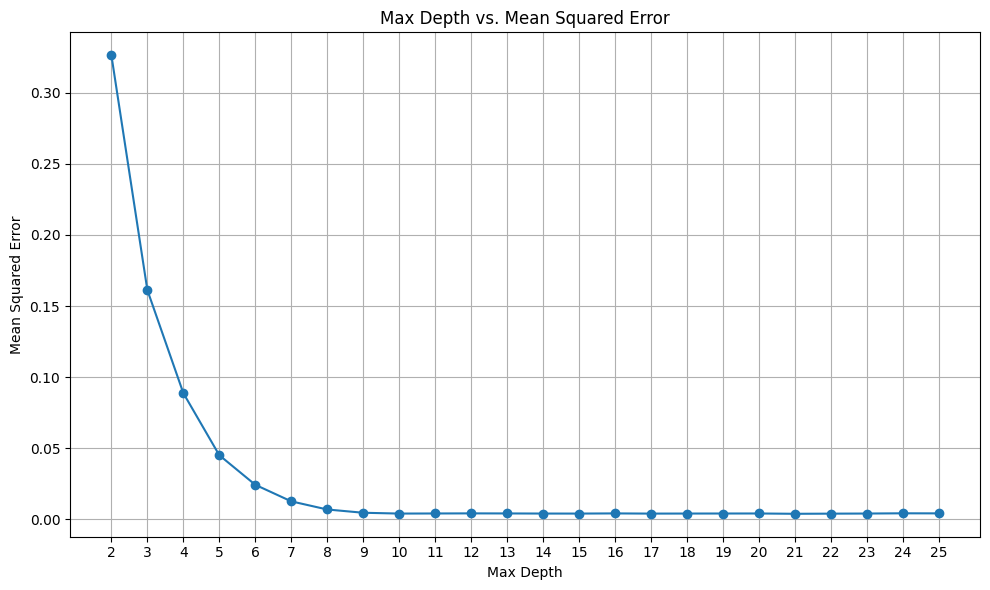

In [53]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(maxdepth_vs_mse['maxdepth'], maxdepth_vs_mse['mse'], marker='o', linestyle='-')
plt.title('Max Depth vs. Mean Squared Error')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.xticks(maxdepth)  # Show all max depth values on x-axis
plt.tight_layout()
plt.show()

In [54]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=7)
#indicating we want max 7 levels of depth, as according to the graph after this there is not much of a decrease in mse

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

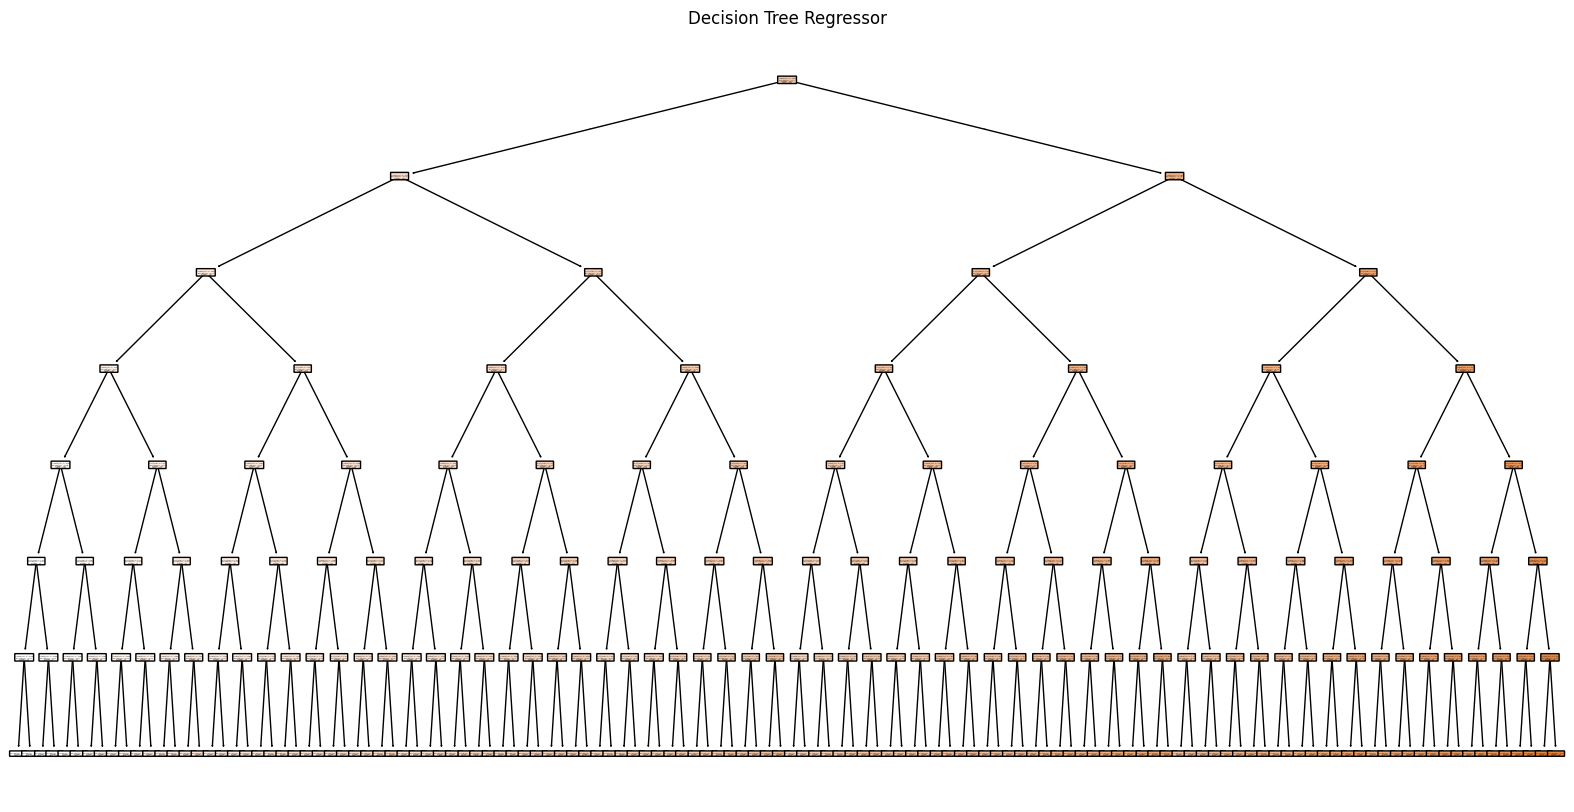

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

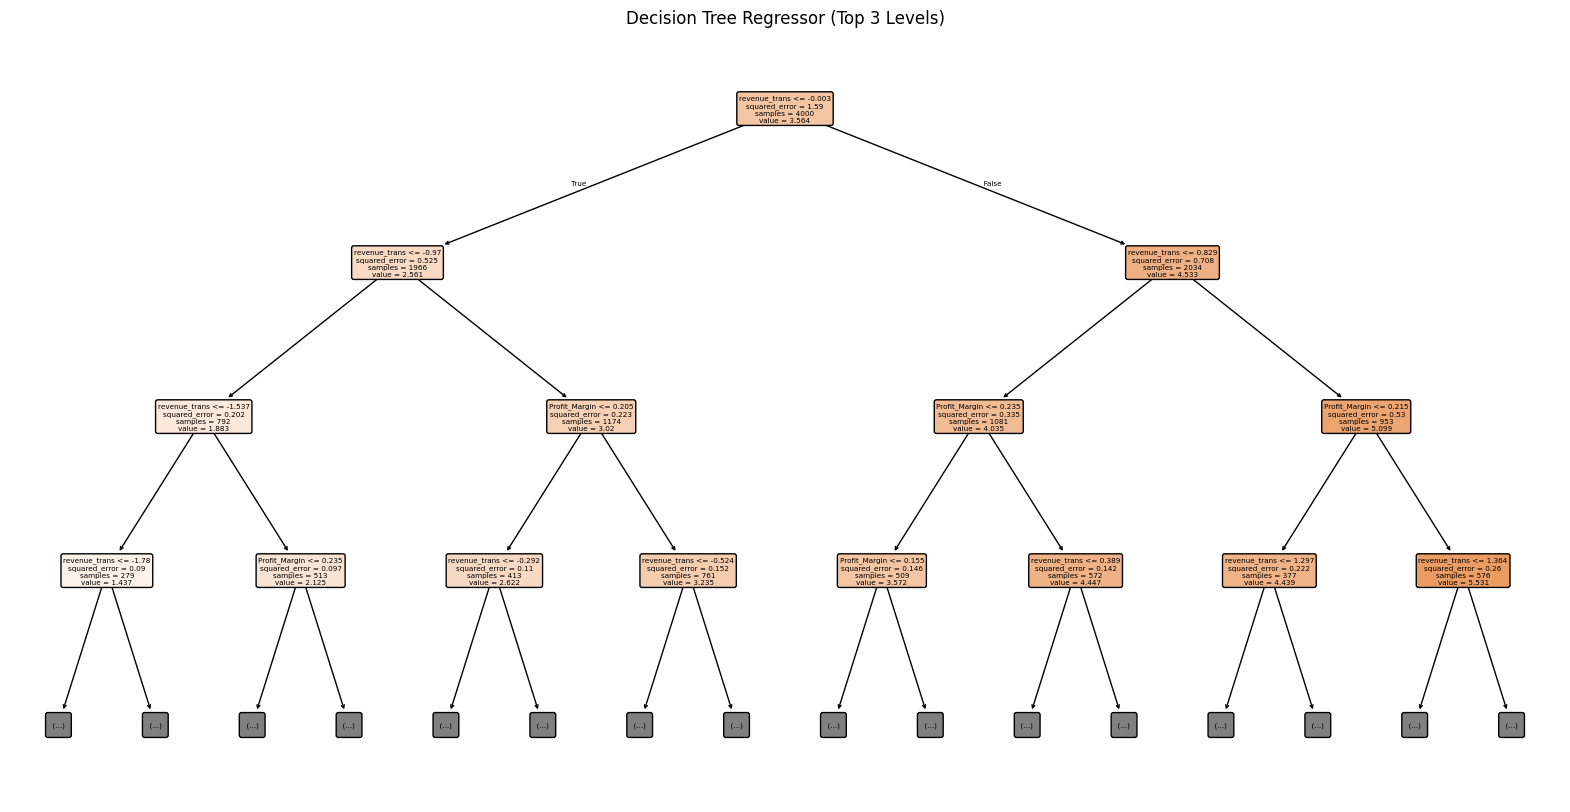

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize only the top 3 levels of the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf,
          max_depth=3,         # Limit depth for readability
          filled=True,
          feature_names=X_train.columns,
          rounded=True)
plt.title("Decision Tree Regressor (Top 3 Levels)")
plt.show()

In [57]:
# Model Accuracy, what level of error does the model have?
r_squared = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("MSE:",mse)

R-squared: 0.9924562058889552
MSE: 0.01267615081579471


In [58]:
df = pd.read_excel("FMCG_Dataset.xlsx")    #reading datafile
df.head()

,Transaction_ID,Date,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit
0,1,2023-01-01,Personal Care,Brand B,30.59,18,0.30,60+,East,Offline,12.25,3900.16,18.98,491,90.619523,550.62,165.1860
1,2,2023-01-02,Household,Brand C,15.65,16,0.16,60+,West,Online,3.20,549.26,12.26,297,75.439891,250.40,40.0640
2,3,2023-01-03,Dairy,Brand D,21.13,11,0.22,18-25,North,Online,9.13,1572.93,25.93,808,78.517927,232.43,51.1346
3,4,2023-01-04,Household,Brand B,11.67,10,0.26,26-35,West,Offline,0.15,928.54,14.07,583,88.150561,116.70,30.3420
4,5,2023-01-05,Household,Brand B,48.34,9,0.27,36-45,East,Online,12.53,2606.19,20.21,57,93.867894,435.06,117.4662


In [59]:
categorical = [col for col in df.columns if df[col].dtype == 'object']

print(categorical)

['Product_Category', 'Brand', 'Customer_Age_Group', 'Region', 'Sales_Channel']


In [60]:
## cleaning data - removing categorical data to check correlation

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Drop all categorical columns except 'y'
cols_to_drop = [col for col in categorical_cols if col != 'y']
cols_to_drop += ['Date']
df_cleaned = df.drop(columns=cols_to_drop)
# Optional: View result
df_cleaned.head()

,Transaction_ID,Unit_Price,Units_Sold,Profit_Margin,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit
0,1,30.59,18,0.30,12.25,3900.16,18.98,491,90.619523,550.62,165.1860
1,2,15.65,16,0.16,3.20,549.26,12.26,297,75.439891,250.40,40.0640
2,3,21.13,11,0.22,9.13,1572.93,25.93,808,78.517927,232.43,51.1346
3,4,11.67,10,0.26,0.15,928.54,14.07,583,88.150561,116.70,30.3420
4,5,48.34,9,0.27,12.53,2606.19,20.21,57,93.867894,435.06,117.4662


                      Transaction_ID  Unit_Price  Units_Sold  Profit_Margin  \
Transaction_ID              1.000000    0.028123    0.000884       0.013281   
Unit_Price                  0.028123    1.000000   -0.018503      -0.005991   
Units_Sold                  0.000884   -0.018503    1.000000       0.017670   
Profit_Margin               0.013281   -0.005991    0.017670       1.000000   
Discount_Applied           -0.019654   -0.000506   -0.013712      -0.002892   
Marketing_Spend             0.005212   -0.022985    0.019581      -0.000304   
Competitor_Price            0.005290    0.009967    0.000495      -0.014255   
Stock_Levels               -0.013156   -0.006420   -0.013362      -0.009363   
Supplier_Reliability        0.010448    0.001414    0.002719       0.019322   
Total_Revenue               0.018062    0.649341    0.655198      -0.000557   
Profit                      0.015092    0.567419    0.581833       0.366857   

                      Discount_Applied  Marketing_S

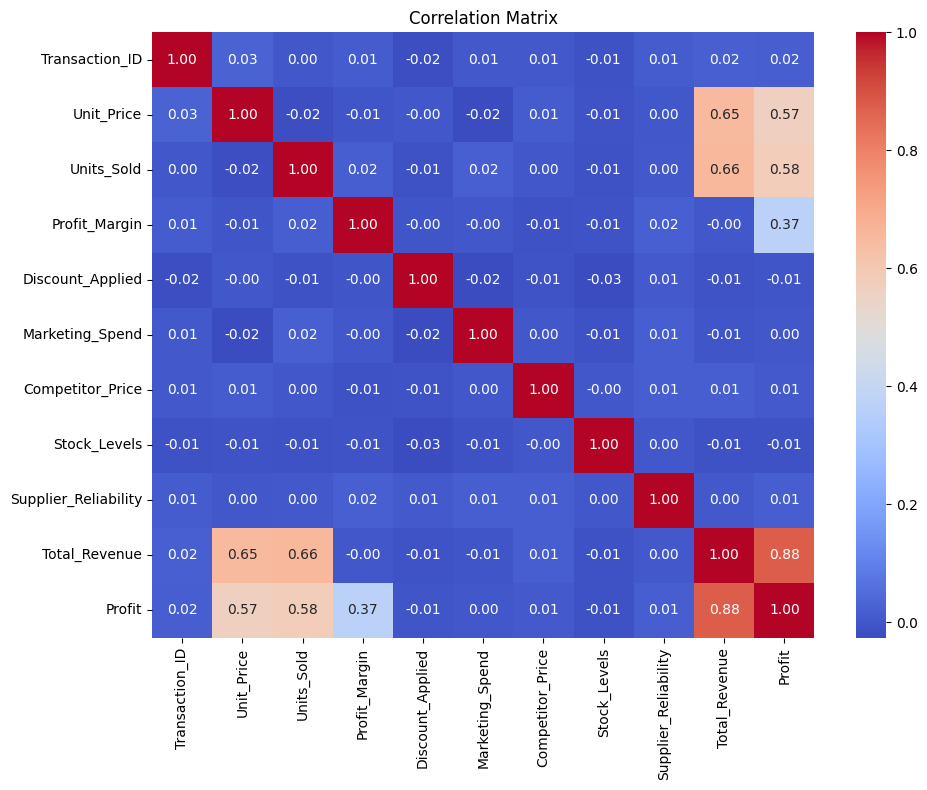

In [61]:
correlation_matrix = df_cleaned.corr()

# Display correlation matrix
print(correlation_matrix)

# Optional: plot heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Findings:
Unit Price is significantly correlated to Total Revenue & Profit
Unit Sold is significantly correlated to Total Revenue & Profit
Profit Margin is mildly correlated to Profit
Total revenue is highly correlated to Profit
     

In [62]:
df = df.drop(columns=['Transaction_ID', 'Date'])
df

,Product_Category,Brand,Unit_Price,Units_Sold,Profit_Margin,Customer_Age_Group,Region,Sales_Channel,Discount_Applied,Marketing_Spend,Competitor_Price,Stock_Levels,Supplier_Reliability,Total_Revenue,Profit
0,Personal Care,Brand B,30.59,18,0.30,60+,East,Offline,12.25,3900.16,18.98,491,90.619523,550.62,165.1860
1,Household,Brand C,15.65,16,0.16,60+,West,Online,3.20,549.26,12.26,297,75.439891,250.40,40.0640
2,Dairy,Brand D,21.13,11,0.22,18-25,North,Online,9.13,1572.93,25.93,808,78.517927,232.43,51.1346
3,Household,Brand B,11.67,10,0.26,26-35,West,Offline,0.15,928.54,14.07,583,88.150561,116.70,30.3420
4,Household,Brand B,48.34,9,0.27,36-45,East,Online,12.53,2606.19,20.21,57,93.867894,435.06,117.4662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Personal Care,Brand C,20.73,6,0.19,60+,South,Offline,17.40,1426.22,42.09,703,83.225787,124.38,23.6322
4996,Personal Care,Brand C,17.83,19,0.27,46-60,South,Online,17.12,4566.40,18.16,708,99.535730,338.77,91.4679
4997,Household,Brand D,20.64,10,0.36,26-35,South,Online,16.74,231.95,29.53,767,86.067044,206.40,74.3040
4998,Personal Care,Brand A,38.29,1,0.35,36-45,East,Offline,10.98,182.46,19.55,978,99.367344,38.29,13.4015


## Comparing Sales Revenue generated from Offline and Online channels


In [63]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import levene
offline_sales = df[df['Sales_Channel'] == 'Offline']['Units_Sold']
online_sales = df[df['Sales_Channel'] == 'Online']['Units_Sold']
## grouping units_sold (sales) into offline and online sales groups

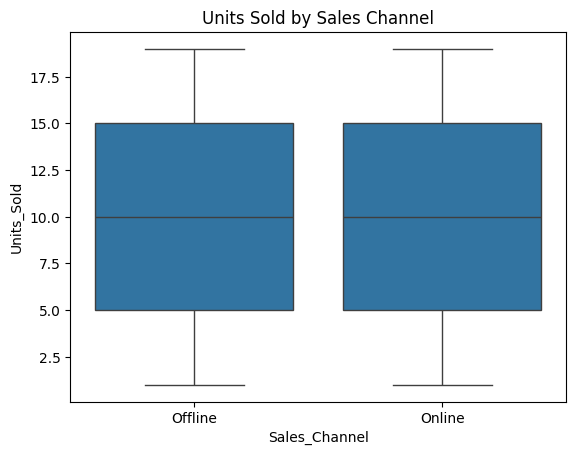

Offline:
 count    2526.000000
mean       10.027316
std         5.560366
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        19.000000
Name: Units_Sold, dtype: float64

Online:
 count    2474.000000
mean       10.158852
std         5.507579
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        19.000000
Name: Units_Sold, dtype: float64


In [64]:
sns.boxplot(x='Sales_Channel', y='Units_Sold', data=df)
plt.title("Units Sold by Sales Channel")
plt.show()
## obtaining summary statistics
print("Offline:\n", offline_sales.describe())
print("\nOnline:\n", online_sales.describe())

In [65]:
# Shapiro-Wilk test - checking for normality in the offline and online sales group
print("Shapiro Test - Offline:", stats.shapiro(offline_sales))
print("Shapiro Test - Online:", stats.shapiro(online_sales))
## this test is not useful for samples with observations above 5000, hence visual representations and lilliefors test is taken up to check normality

Shapiro Test - Offline: ShapiroResult(statistic=np.float64(0.9451644321091982), pvalue=np.float64(1.1148256600566803e-29))
Shapiro Test - Online: ShapiroResult(statistic=np.float64(0.9472179006428718), pvalue=np.float64(6.34843884661857e-29))


 This test is not useful for samples with observations above 5000, hence visual representations and lilliefors test is taken up to check for normality in data.


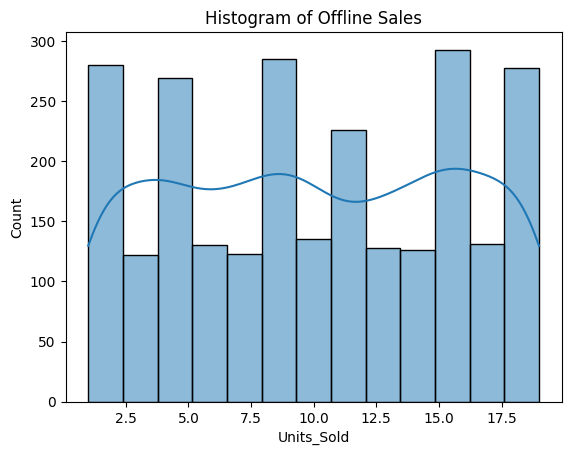

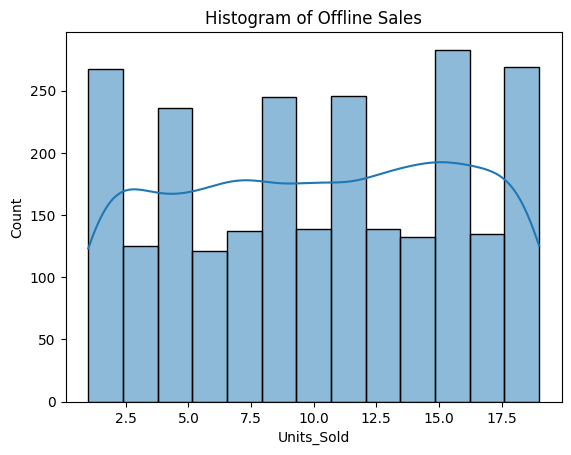

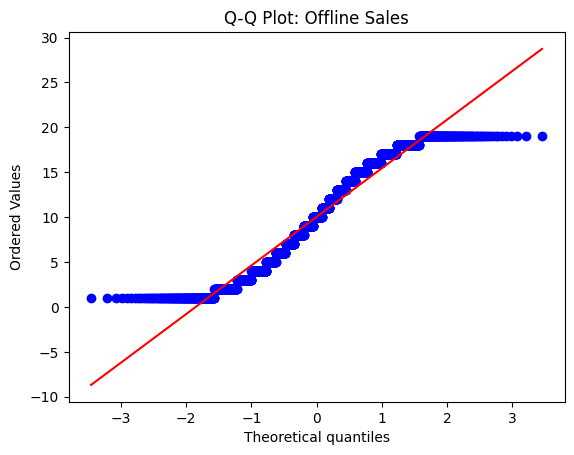

In [66]:
sns.histplot(offline_sales, kde=True)
plt.title("Histogram of Offline Sales")
plt.show()

sns.histplot(online_sales, kde=True)
plt.title("Histogram of Offline Sales")
plt.show()

stats.probplot(offline_sales, dist="norm", plot=plt)
plt.title("Q-Q Plot: Offline Sales")
plt.show()




Since the p value is significantly lower than 0.05, hence we reject the null hypothesis. The average sales revenue from the offline and online channels are significantly different.

Using Yeo-Johnson transformation to fix skewness of Revenue


In [67]:
from scipy.stats import shapiro, levene, f_oneway, probplot
from sklearn.preprocessing import PowerTransformer

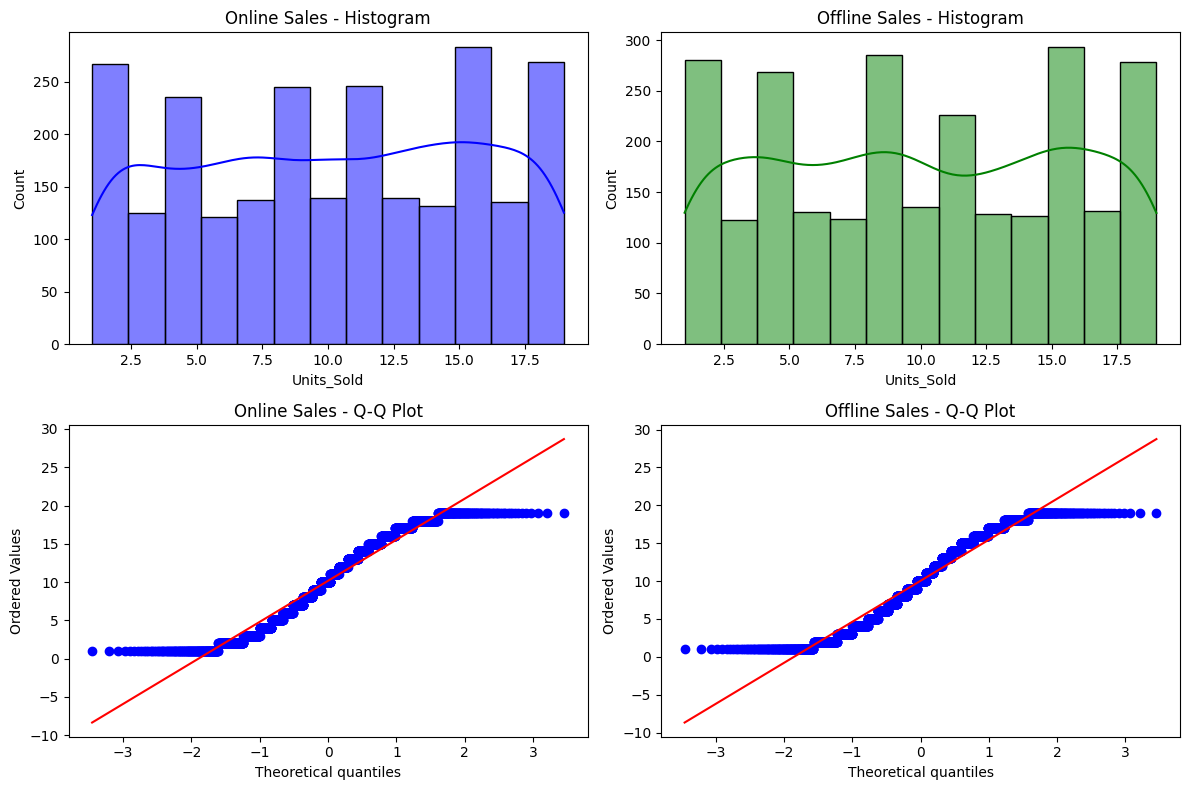

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(online_sales, kde=True, ax=axes[0, 0], color='blue').set_title('Online Sales - Histogram')
sns.histplot(offline_sales, kde=True, ax=axes[0, 1], color='green').set_title('Offline Sales - Histogram')
probplot(online_sales, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Online Sales - Q-Q Plot')
probplot(offline_sales, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Offline Sales - Q-Q Plot')
plt.tight_layout()
plt.show()

In [69]:
pt = PowerTransformer(method='yeo-johnson')
combined = pd.concat([online_sales, offline_sales]).values.reshape(-1, 1)
transformed = pt.fit_transform(combined).flatten()
## Transforming skewed data by using Yeo-Johnson test

In [70]:
transformed_df = pd.DataFrame({
    'Sales_Channel': ['Online'] * len(online_sales) + ['Offline'] * len(offline_sales),
    'Transformed_Revenue': transformed
})
online_trans = transformed_df[transformed_df['Sales_Channel'] == 'Online']['Transformed_Revenue']
offline_trans = transformed_df[transformed_df['Sales_Channel'] == 'Offline']['Transformed_Revenue']
## splitting the transformed & normalised data into online and offline sales revenue groups


Shapiro-Wilk Test (Post-Transformation):
Online: ShapiroResult(statistic=np.float64(0.9461388911744234), pvalue=np.float64(3.548572325187125e-29))
Offline: ShapiroResult(statistic=np.float64(0.9459196925634443), pvalue=np.float64(1.6678506314029383e-29))

Levene's Test (Post-Transformation):
LeveneResult(statistic=np.float64(0.5690955801044819), pvalue=np.float64(0.4506540738088135))


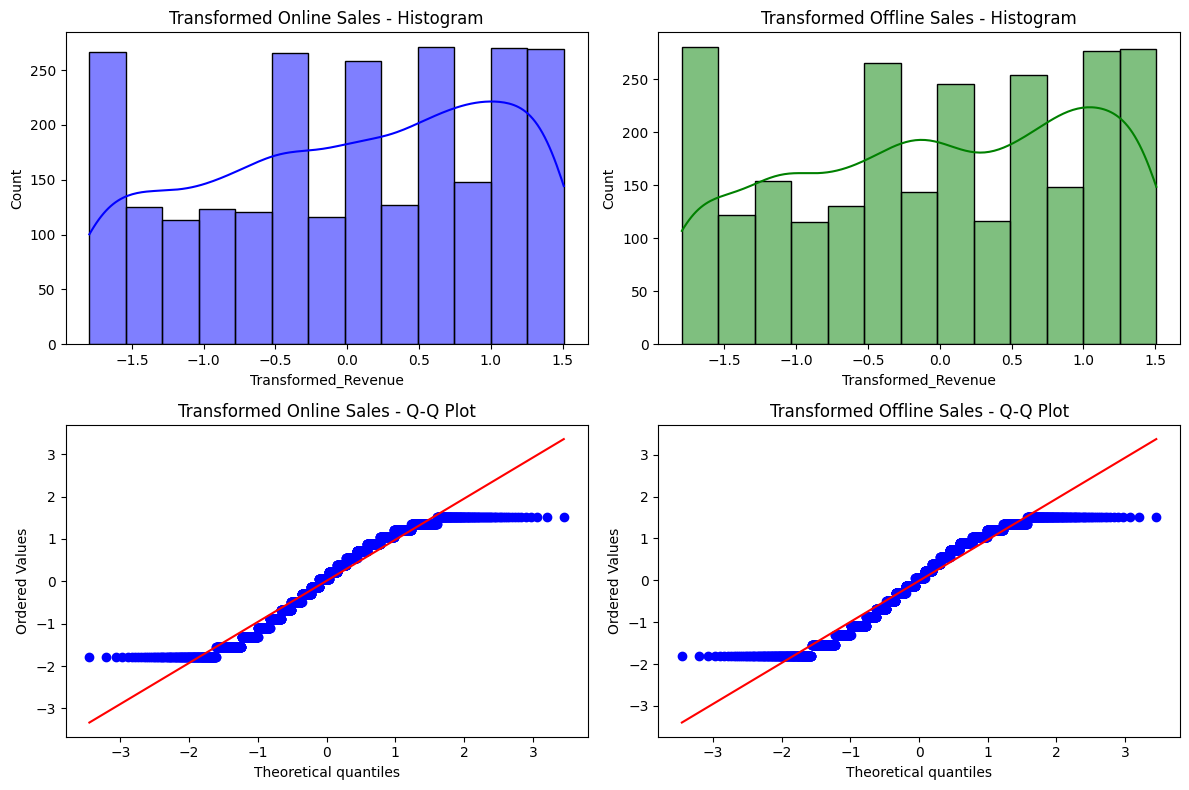

In [71]:
print("\nShapiro-Wilk Test (Post-Transformation):")
print("Online:", shapiro(online_trans))
print("Offline:", shapiro(offline_trans))

print("\nLevene's Test (Post-Transformation):")
print(levene(online_trans, offline_trans))
## running Shapiro-Wilkensen and Levene's test to check for normality and homogeneity in variances post applying Yeo-Johnson transformation

# Histograms and Q-Q plots post-transformation
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(online_trans, kde=True, ax=axes[0, 0], color='blue').set_title('Transformed Online Sales - Histogram')
sns.histplot(offline_trans, kde=True, ax=axes[0, 1], color='green').set_title('Transformed Offline Sales - Histogram')
probplot(online_trans, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Transformed Online Sales - Q-Q Plot')
probplot(offline_trans, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Transformed Offline Sales - Q-Q Plot')
plt.tight_layout()
plt.show()



In [72]:

# Final ANOVA test
anova_result = f_oneway(online_trans, offline_trans)
print("\nANOVA Result:")
print(anova_result)


ANOVA Result:
F_onewayResult(statistic=np.float64(0.7655277781602193), pvalue=np.float64(0.3816461779561976))


Hence, using the Yeo-Johnson test and running an Anova Test over the online and offline groups, we fail to reject the null hypothesis, hence the average sales revenue across online and offline channels is not significantly different.




# Regression used to test effect of Discount_Applied on Marketing_Spend

H_o: Discount applied has no significant effect on Marketing Spend,  
H_a : Discount applied has a significant effect on Marketing Spend

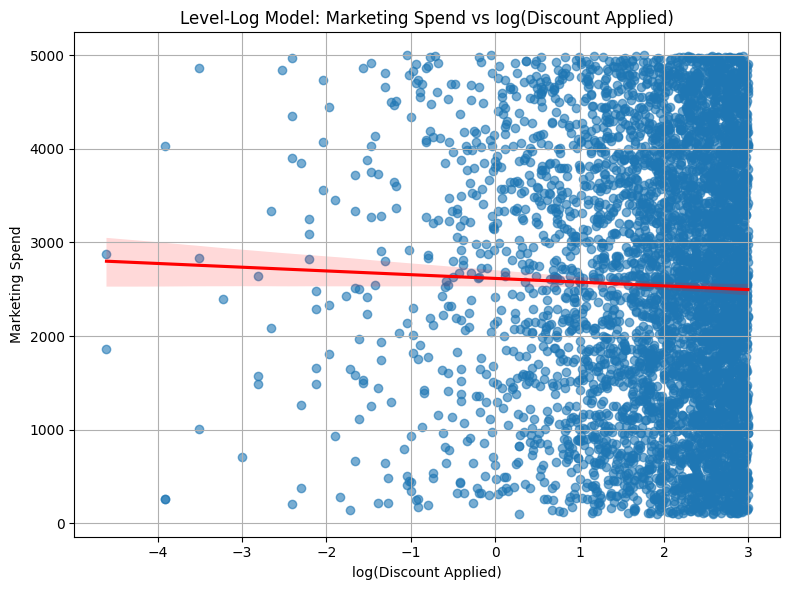

In [73]:
# Scatter plot - check for linearity
## Running a Level-Log model between Discount Applied (x) and Marketing_Spend(y)
df_filtered = df[df["Discount_Applied"] > 0].copy()
df_filtered["log_discount"] = np.log(df_filtered["Discount_Applied"])

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x="log_discount",
    y="Marketing_Spend",
    data=df_filtered,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("Level-Log Model: Marketing Spend vs log(Discount Applied)")
plt.xlabel("log(Discount Applied)")
plt.ylabel("Marketing Spend")
plt.grid(True)
plt.tight_layout()
plt.show()

We have chosen to run a level-log SLR model between Marketing_Spend and Discount_Applied because Marketing_Spend has the highest negative correlation with Discount_Applied in this dataset (Check the correlation matrix at the start of the file)

In [74]:
df_filtered = df[df["Discount_Applied"] > 0].copy()
df_filtered["log_discount"] = np.log(df_filtered["Discount_Applied"])

# Split Marketing_Spend into two groups based on the median
median_spend = df_filtered["Marketing_Spend"].median()
group_low = df_filtered[df_filtered["Marketing_Spend"] <= median_spend]["log_discount"]
group_high = df_filtered[df_filtered["Marketing_Spend"] > median_spend]["log_discount"]

# Perform Levene's test
levene_stat, levene_p = levene(group_low, group_high)

print("Levene's Test Statistic:", levene_stat)
print("p-value:", levene_p)

Levene's Test Statistic: 1.7125368949504964
p-value: 0.19071677067198087


Since, p > 0.05, we fail to reject the null, hence both marketing_spend groups have equal variances of log(discount_applied)

In [75]:
# Run Shapiro-Wilk test on both groups
# Shapiro-Wilk Test on log_discount (entire data)
shapiro_stat, shapiro_p = shapiro(df_filtered["log_discount"])

print("\nShapiro-Wilk Test on log(Discount_Applied):")
print("Statistic:", shapiro_stat)
print("p-value:", shapiro_p)


Shapiro-Wilk Test on log(Discount_Applied):
Statistic: 0.8235364925659023
p-value: 3.130473238066851e-59


Log(Discount_Applied) is not normally distributed. Hence, I will use the Yeo-Johnson test to normalise it


Yeo-Johnson lambda: 0.7291946765871455
Shapiro-Wilk Test on Yeo-Johnson Transformed Discount_Applied:
Statistic: 0.9556176563047403
p-value: 1.641728872585753e-36


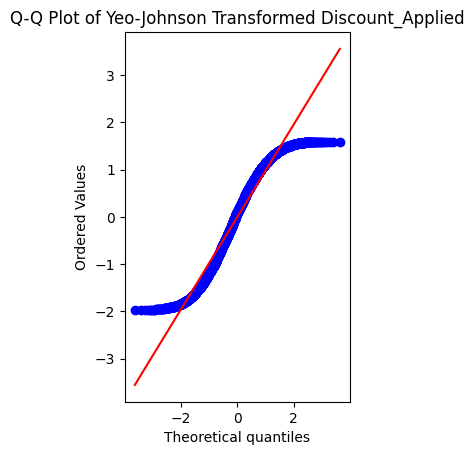

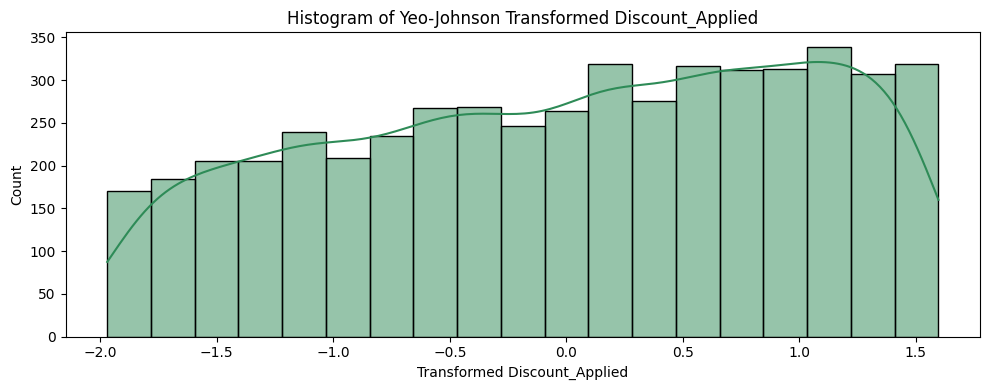

In [76]:
pt = PowerTransformer(method='yeo-johnson')
df_filtered["yeoj_discount"] = pt.fit_transform(df_filtered[["Discount_Applied"]])

# Print lambda value used
print(f"Yeo-Johnson lambda: {pt.lambdas_[0]}")

# Check normality with Shapiro-Wilk
stat, p = shapiro(df_filtered["yeoj_discount"])
print("Shapiro-Wilk Test on Yeo-Johnson Transformed Discount_Applied:")
print("Statistic:", stat)
print("p-value:", p)

# Plot histogram & Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(df_filtered["yeoj_discount"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Yeo-Johnson Transformed Discount_Applied")

plt.figure(figsize=(10, 4))
sns.histplot(df_filtered["yeoj_discount"], kde=True, color="seagreen")
plt.title("Histogram of Yeo-Johnson Transformed Discount_Applied")
plt.xlabel("Transformed Discount_Applied")
plt.tight_layout()
plt.show()

The data on log(discount_applied) has been significantly normalised.

In [77]:
import statsmodels.api as sm
df_filtered = df[df["Discount_Applied"] > 0].copy()
df_filtered["log_discount"] = np.log(df_filtered["Discount_Applied"])

# Define independent (X) and dependent (Y) variables
X = df_filtered["Marketing_Spend"]
y = df_filtered["log_discount"]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_discount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.037
Date:                Fri, 25 Apr 2025   Prob (F-statistic):             0.0446
Time:                        21:45:02   Log-Likelihood:                -7094.6
No. Observations:                4996   AIC:                         1.419e+04
Df Residuals:                    4994   BIC:                         1.421e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0359      0.029     

Result of Regression: More marketing spend is associated with a slightly lower discount being applied (in log terms).

Hence, we reject the null hypothesis

# Analysing effect of Discount_applied on Stock Levels

H_o: Discount applied has no significant effect on Stock Levels,
H_a : Discount applied has a significant effect on Stock Levels.

We have chosen to run a level-log SLR model between Stock Levels and Discount_Applied because Stock Levels has the highest negative correlation with Discount_Applied in this dataset (Check the correlation matrix at the start of the file)

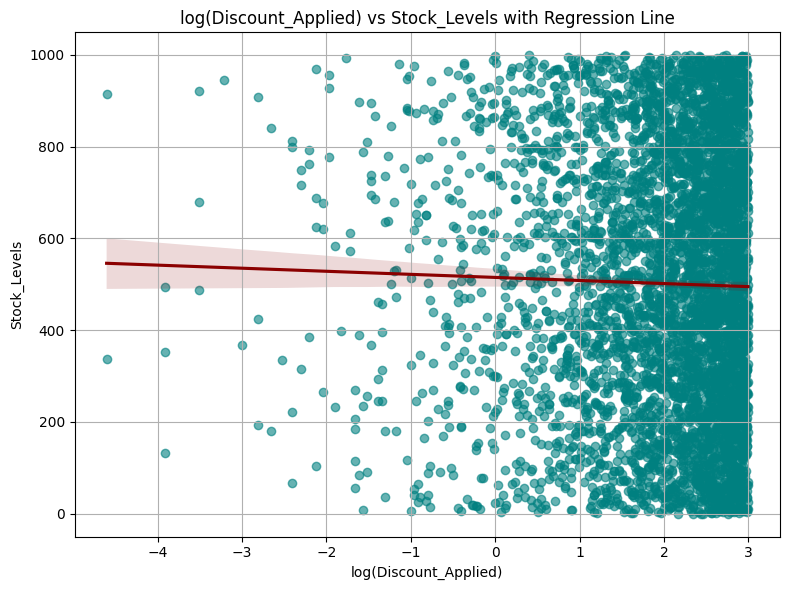

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where Discount_Applied <= 0 to avoid log errors
df_filtered = df[df['Discount_Applied'] > 0].copy()

# Compute log of Discount_Applied
df_filtered['Log_Discount'] = np.log(df_filtered['Discount_Applied'])

# Plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Log_Discount',
    y='Stock_Levels',
    data=df_filtered,
    scatter_kws={'alpha': 0.6, 'color': 'teal'},
    line_kws={'color': 'darkred'}
)

plt.title('log(Discount_Applied) vs Stock_Levels with Regression Line')
plt.xlabel('log(Discount_Applied)')
plt.ylabel('Stock_Levels')
plt.grid(True)
plt.tight_layout()
plt.show()



In [79]:
from scipy.stats import levene

df_filtered = df[df['Discount_Applied'] > 0].copy()
df_filtered['Log_Discount'] = np.log(df_filtered['Discount_Applied'])

# Group by Product_Category and extract log-discounts per group
grouped = df_filtered.groupby('Product_Category')['Log_Discount'].apply(list)

# Run Levene's test across all product category groups
stat, p_value = levene(*grouped)

# Output the results
print(f"Levene's Test Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")


Levene's Test Statistic: 1.0502
P-value: 0.3796


Variances of Discount_Applied over product category are equal

In [80]:
from scipy.stats import shapiro
import numpy as np

# Filter to avoid log(0) or negative values
discount_values = df['Discount_Applied']
discount_log = np.log(discount_values[discount_values > 0])

# Run Shapiro-Wilk test
stat, p = shapiro(discount_log)

# Display results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p}")



Shapiro-Wilk Test Statistic: 0.8235364925659023
P-value: 3.130473238066851e-59


Running Yeo-Johnson to normalise log(discount_applied) data

Yeo-Johnson lambda: 0.7291946765871455
Shapiro-Wilk Test on Yeo-Johnson Transformed Discount_Applied:
Statistic: 0.9556176563047403
p-value: 1.641728872585753e-36


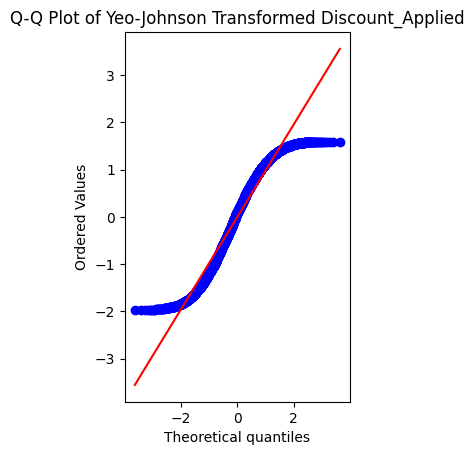

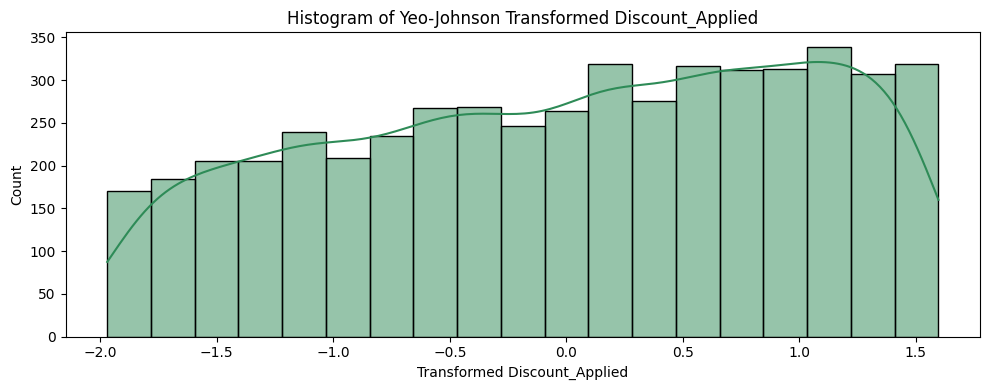

In [81]:
pt = PowerTransformer(method='yeo-johnson')
df_filtered["yeoj_discount"] = pt.fit_transform(df_filtered[["Discount_Applied"]])

# Print lambda value used
print(f"Yeo-Johnson lambda: {pt.lambdas_[0]}")

# Check normality with Shapiro-Wilk
stat, p = shapiro(df_filtered["yeoj_discount"])
print("Shapiro-Wilk Test on Yeo-Johnson Transformed Discount_Applied:")
print("Statistic:", stat)
print("p-value:", p)

# Plot histogram & Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(df_filtered["yeoj_discount"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Yeo-Johnson Transformed Discount_Applied")

plt.figure(figsize=(10, 4))
sns.histplot(df_filtered["yeoj_discount"], kde=True, color="seagreen")
plt.title("Histogram of Yeo-Johnson Transformed Discount_Applied")
plt.xlabel("Transformed Discount_Applied")
plt.tight_layout()
plt.show()

In [82]:
import statsmodels.api as sm
df_filtered = df[df["Discount_Applied"] > 0].copy()
df_filtered["log_discount"] = np.log(df_filtered["Discount_Applied"])

# Define independent (X) and dependent (Y) variables
X = df_filtered["Stock_Levels"]
y = df_filtered["log_discount"]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_discount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.739
Date:                Fri, 25 Apr 2025   Prob (F-statistic):             0.0980
Time:                        21:45:05   Log-Likelihood:                -7095.3
No. Observations:                4996   AIC:                         1.419e+04
Df Residuals:                    4994   BIC:                         1.421e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0257      0.029     70.835   

The regression of Stock levels with Discount_Applied displays that there is no significant effect of Discount_applied over stock levels.

#**Checking if there is a significant difference in sales made across different age groups**

In [83]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(df.columns)

# Replace 'Age_Group' and 'Units_Sold' with actual column names if different
# One-way ANOVA
model = ols('Units_Sold ~ C(Customer_Age_Group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table)

# If p-value < 0.05, run post-hoc test
if anova_table['PR(>F)'][0] < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['Units_Sold'],
                              groups=df['Age_Group'],
                              alpha=0.05)
    print("\nTukey HSD Results:")
    print(tukey.summary())
else:
    print("\nNo statistically significant difference between age groups.")

Index(['Product_Category', 'Brand', 'Unit_Price', 'Units_Sold',
       'Profit_Margin', 'Customer_Age_Group', 'Region', 'Sales_Channel',
       'Discount_Applied', 'Marketing_Spend', 'Competitor_Price',
       'Stock_Levels', 'Supplier_Reliability', 'Total_Revenue', 'Profit'],
      dtype='object')
ANOVA Table:
                              sum_sq      df         F   PR(>F)
C(Customer_Age_Group)      86.506382     4.0  0.705967  0.58776
Residual               153016.804818  4995.0       NaN      NaN

No statistically significant difference between age groups.


<ipython-input-83-416976e969f7>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


# **Analysing Revenue earned across different regions**

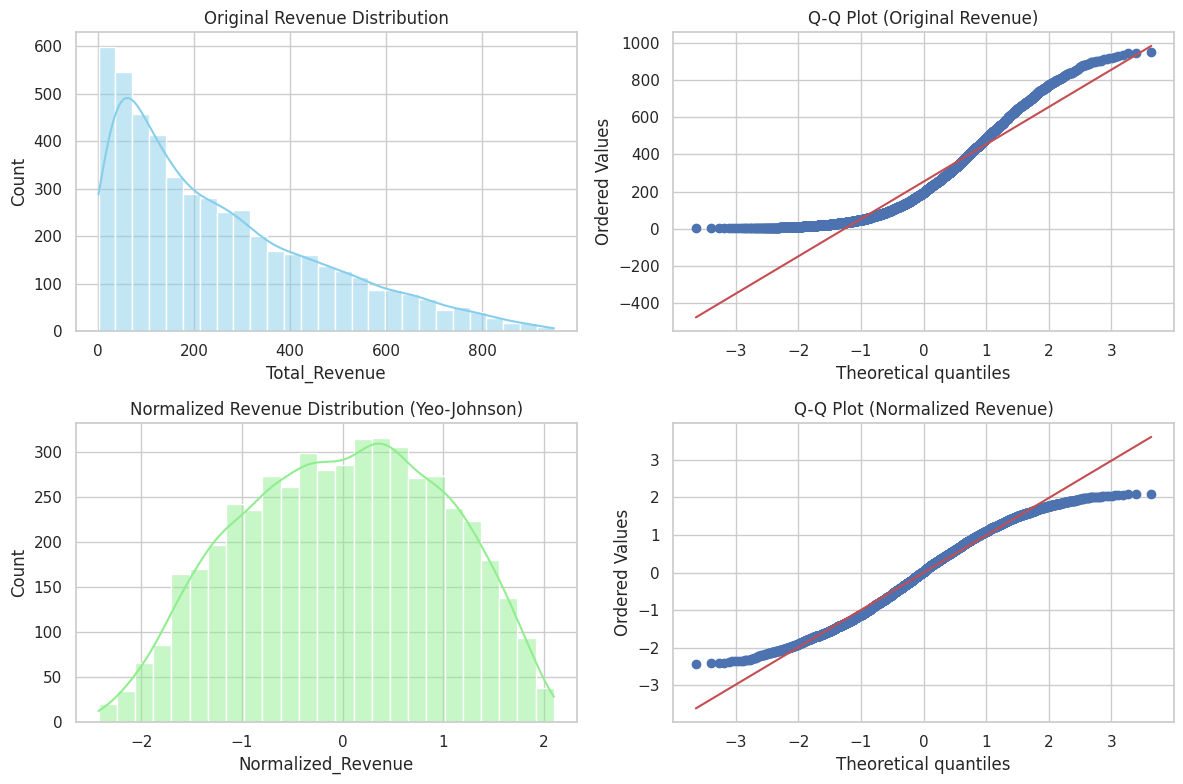

In [84]:
# Column name
revenue_col = 'Total_Revenue'

# Drop missing revenue
df = df.dropna(subset=[revenue_col])

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df['Normalized_Revenue'] = pt.fit_transform(df[[revenue_col]])

# === Plotting ===

# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram before
sns.histplot(df[revenue_col], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Original Revenue Distribution")

# Q-Q plot before
stats.probplot(df[revenue_col], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot (Original Revenue)")

# Histogram after
sns.histplot(df['Normalized_Revenue'], kde=True, ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_title("Normalized Revenue Distribution (Yeo-Johnson)")

# Q-Q plot after
stats.probplot(df['Normalized_Revenue'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot (Normalized Revenue)")

plt.tight_layout()
plt.show()



In [85]:
!pip install pingouin

import pingouin as pg
from scipy.stats import normaltest

# Ensure correct columns
region_col = 'Region'
normalized_col = 'Normalized_Revenue'

# Drop missing values
df = df[[region_col, normalized_col]].dropna()

# Step 1: One-way ANOVA
model = ols(f'{normalized_col} ~ C({region_col})', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA Table (on Normalized Revenue by Region):")
print(anova_table)

# Step 2: Check ANOVA result
p_val = anova_table['PR(>F)'][0]
if p_val < 0.05:
    print("\n✅ Significant differences found between regions (p < 0.05). Running pairwise t-tests...\n")

    # Step 3: Pairwise t-tests with Bonferroni correction
    ttests = pg.pairwise_ttests(dv=normalized_col, between=region_col, data=df,
                                 padjust='bonf', effsize='cohen')

    # Display relevant columns
    print(ttests[['A', 'B', 'T', 'p-unc', 'p-corr', 'significant', 'cohen-d']])
else:
    print("\n❌ No statistically significant difference found between regions (p >= 0.05).")



ANOVA Table (on Normalized Revenue by Region):
                sum_sq      df         F   PR(>F)
C(Region)     6.391923     3.0  2.131661  0.09404
Residual   4993.608077  4996.0       NaN      NaN

❌ No statistically significant difference found between regions (p >= 0.05).


<ipython-input-85-2ea2593f1918>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table['PR(>F)'][0]
